# Introduction and Problem Statement

We are a team of data scientists working in real estate consultancy based in Iowa specialising in providing advice to clients on property investment opportunities in Ames, Iowa, using linear regression.

The aim of this project is to:

- Identify the relationship between the price of a property and the other features of the property.
- Identify undervaled houses


### Imports and reading of dataset


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
import statsmodels.api as sm

%matplotlib inline
pd.set_option("display.max_columns", 700)
pd.set_option("display.max_rows", 700)

In [2]:
# Reading of the train and test dataset
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

combine = [df_train, df_test]


In [3]:
# check the count of datatypes
display(
    df_train.dtypes.reset_index()
    .rename(columns={"index": "features", 0: "dtypes"})
    .groupby("dtypes")["features"]
    .count()
)
display(
    df_test.dtypes.reset_index()
    .rename(columns={"index": "features", 0: "dtypes"})
    .groupby("dtypes")["features"]
    .count()
)

dtypes
int64      28
float64    11
object     42
Name: features, dtype: int64

dtypes
int64      35
float64     3
object     42
Name: features, dtype: int64

In [4]:
display(df_train.shape)
display(df_test.shape)

(2051, 81)

(878, 80)

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Exploratory Data Analysis


### Simple Exploratory Data Analysis

In [7]:
# Reading the shape
print(df_train.shape)
print(df_test.shape)

# The train dataset consist of 2051 rows and 81 columns
# The test dataset consist of 878 rows and 80 columns

(2051, 81)
(878, 80)


In [8]:
# basic describe for both datas
display(df_train.describe())
display(df_test.describe())

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [9]:
# Sneak peek of the data
display(df_train.head())

display(df_test.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
# Set the ID to be the index
for c in combine:
    c.set_index("Id", inplace=True)


In [11]:
# Dropping of the PID columns - PID indicates the Parcel Identification Number used to identify the property. This column will be dropped as it is not useful for the analysis.
for c in combine:
    c.drop(columns=["PID"], inplace=True)

Looking into the categorical variables


In [12]:
# basic describe for categorical values, taking that they are object dtype
display(df_train.describe(include="object"))
display(df_test.describe(include="object"))

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
count,2051,2051,140,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2029,2051,2051,2051,1996,1996,1993,1996,1995,2051,2051,2051,2051,2051,2051,1051,1938,1937,1937,1937,2051,9,400,65,2051
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,5,5,4,6,6,5,5,2,5,4,8,5,6,3,5,5,3,4,4,5,9
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
freq,1598,2044,85,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,1619,2025,724,721,1218,1247,1778,926,887,1834,1339,615,1749,2018,1065,1910,1868,1047,1915,523,1213,849,1832,1868,1861,4,227,56,1781


,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
count,878,878,58,878,878,878,878,878,878,878,878,878,878,878,878,878,878,877,878,878,878,853,853,853,853,853,878,878,878,877,878,878,456,834,833,833,833,878,4,172,41,878
unique,6,2,2,4,4,2,5,3,26,9,3,5,8,6,6,13,16,5,4,5,6,5,3,4,6,6,4,4,2,4,5,6,5,6,3,4,5,3,2,4,3,10
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD
freq,674,873,35,564,790,877,636,835,133,755,875,724,422,702,861,302,294,534,552,770,383,396,781,567,248,749,866,429,823,813,447,812,220,518,382,782,796,790,3,103,39,755


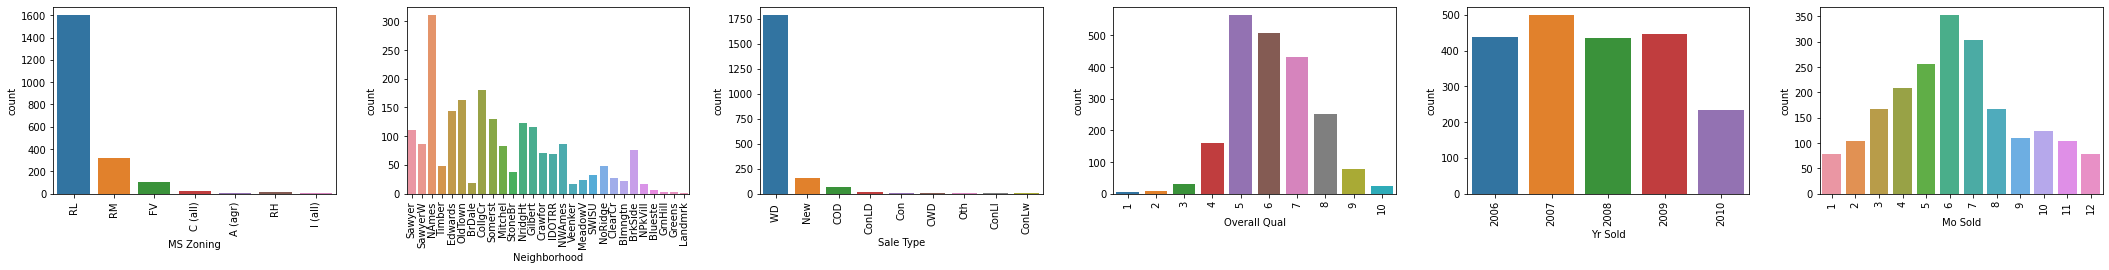

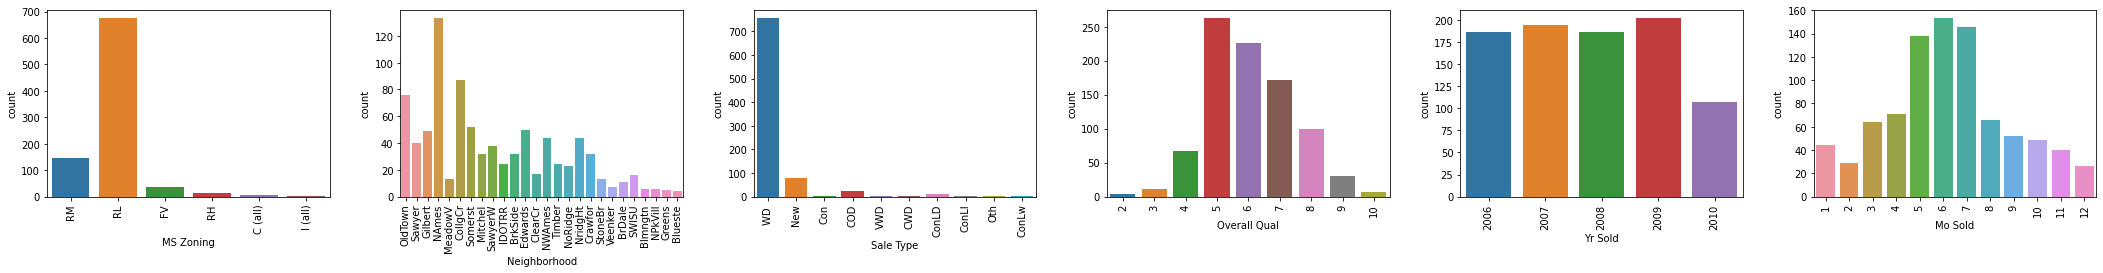

In [13]:
# Looking into the distributions of some of the categorical columns

cols = ["MS Zoning", "Neighborhood", "Sale Type", "Overall Qual", "Yr Sold", "Mo Sold"]

fig, axes = plt.subplots(1, 6, figsize=(30, 4))

fig.tight_layout(h_pad=10, w_pad=4, pad=4)

for ax_id, value in enumerate(cols):

    sns.countplot(data=df_train, x=value, ax=axes[ax_id])
    axes[ax_id].tick_params(axis="x", labelrotation=90)


fig, axes = plt.subplots(1, 6, figsize=(30, 4))

fig.tight_layout(h_pad=10, w_pad=4, pad=4)

for ax_id, value in enumerate(cols):

    sns.countplot(data=df_test, x=value, ax=axes[ax_id])
    axes[ax_id].tick_params(axis="x", labelrotation=90)


plt.show()

The above plots shows that for MS Zoning, Neighborhood, and Sale Type, there is a specific value that occurs most commonly to the data.
* MS Zoning - "RL" = Residential Low Density
* Neighborhood - "NAmes = North Ames
* Sale Type - "WD" = Warranty Deed - Conventional
* Most of the houses sold were around the Overall Qual of 5 - 7.
* Over the years, the count of houses sold were roughly the same, with expection for 2010 - further investigation is required.
* Most houses were sold during the months of Jun and July, which could coincide with the peak of the summer. 

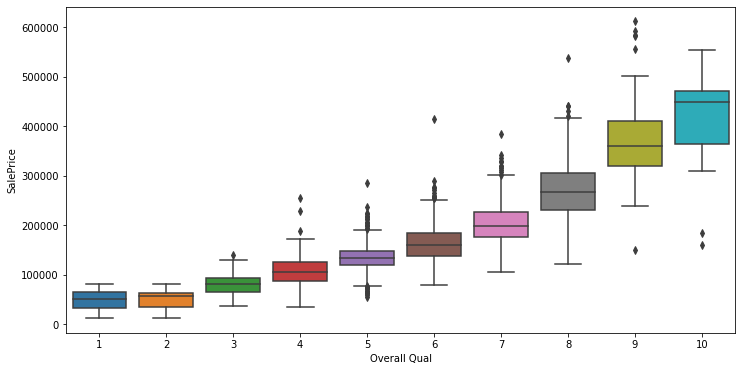

In [14]:
# Box plot for overall qual and saleprice

plt.figure(figsize=(12, 6))
sns.boxplot(x="Overall Qual", y="SalePrice", data=df_train)

plt.show()

Comparing the overall qual and sale price confirms the logic that the higher the overall qual, the more expensive the house.


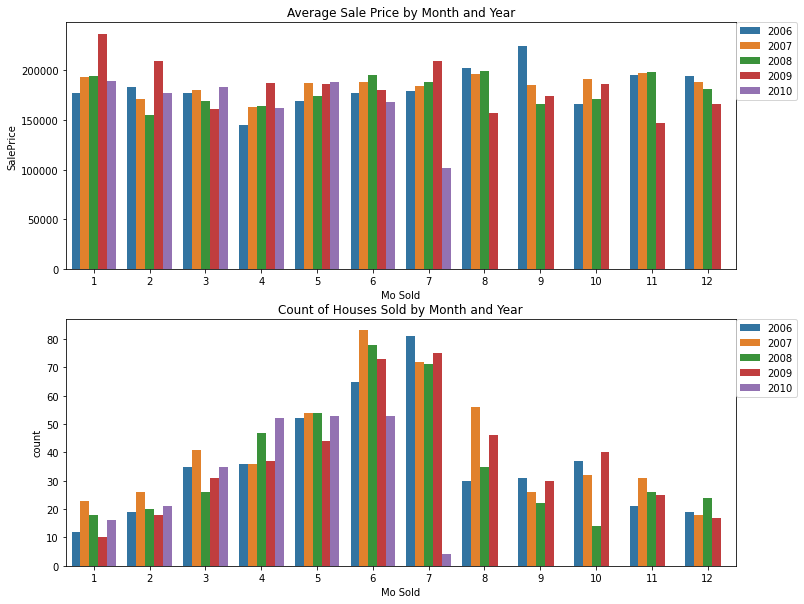

In [15]:
# Looking into the time period that the house is sold

# Mapping out the axis for the plots - the subplots(x,y) - where x is the top to bottom position, and y is the left to right position
fig, axes = plt.subplots(2,1, figsize=(12,10))

# Creation of new dataframe to extract wanted features
df_train_mth_yr = df_train[["SalePrice", "Yr Sold", "Mo Sold"]].reset_index(drop=True)
df_train_mth_yr = (
    df_train_mth_yr.groupby(["Yr Sold", "Mo Sold"])["SalePrice"].mean().reset_index()
)

# Use seaborn barplot to plot out bar chart 
# By default, barplot will plot out the average of the column - Refer to documentation
sns.barplot(
    data=df_train_mth_yr,
    x="Mo Sold",
    y="SalePrice",
    hue="Yr Sold",
    ax=axes[0]
)

# This is to move the legend out of the chart
axes[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
axes[0].set_title("Average Sale Price by Month and Year")

# Plotting of the second chart
sns.countplot(
    data=df_train,
    x="Mo Sold",
    hue="Yr Sold",
    ax=axes[1]
)

axes[1].set_title("Count of Houses Sold by Month and Year")
# plt.title("Mean Sale Price by Month and Year")
axes[1].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig("./charts/Ave count by time sold.png")
plt.show()

From the mean sale price, we can see that there is incomplete data in the month of July 2010.
Furthermore, the mean sale price is seen to be roughly the same overall, with major spiking seen in the months of Feb 2009 and Sep 2006

It is observed that the 2010 sale price could be incomplete, as the sale of the houses is only until July.

In comparsion with the other years, the best time to sell a house is in the months of June and July. However, the best time to sell the house with the highest price would be in the months of Jan, Feb and Mar.


### More in-depth Exploratory Data Analysis

In addition, coming from an outsider point of view, and as someone who is also interested in buying a house. In our local context, we are mostly interested in some of the factors that are relatable to the current problem statement:

1. Location
2. Home Size and usable space
3. Age and Condition
4. Upgrades and updates

Source: https://www.opendoor.com/w/blog/factors-that-influence-home-value 

#### Location and House Type

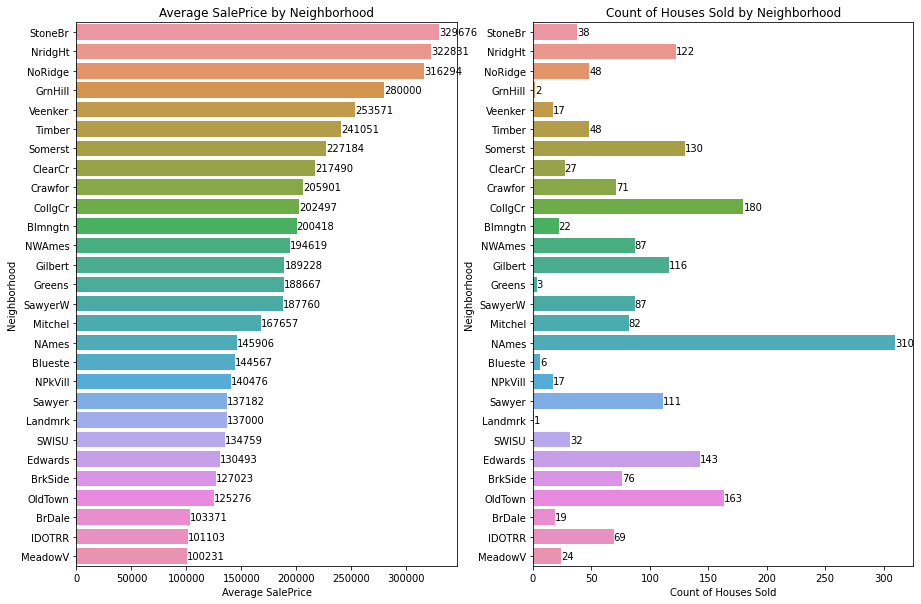

In [16]:
# Looking into the location of the houses sold

# Setting the grid for the charts
fig, axes = plt.subplots(1,2, figsize=(15,10))

df_train_loc_hou = df_train[["SalePrice", "Neighborhood"]].reset_index(drop=True)
df_train_loc_hou = (
    df_train_loc_hou.groupby(["Neighborhood"])["SalePrice"].mean().reset_index()
)


sns.barplot(
    data=df_train_loc_hou,
    y="Neighborhood",
    x="SalePrice",
    order=df_train_loc_hou.groupby('Neighborhood')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['Neighborhood'],
    ci=None,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_xlabel("Average SalePrice")
axes[0].set_title("Average SalePrice by Neighborhood")

sns.countplot(
    data=df_train,
    y="Neighborhood",
    order=df_train.groupby('Neighborhood')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['Neighborhood'],
    ax=axes[1]
)

axes[1].bar_label(axes[1].containers[0])
axes[1].set_xlabel("Count of Houses Sold")
axes[1].set_title("Count of Houses Sold by Neighborhood")

plt.savefig("./charts/Ave and count for Neighborhood.png", bbox_inches='tight')
plt.show()



The charts above shows that the highest average sale price can be seen from the neighborhood of Northridge Heights, Stone Brook and Northridge.
However, in contrast, most of the sales made are from the neighborhood of North Ames and the neighborhood of College Creek.

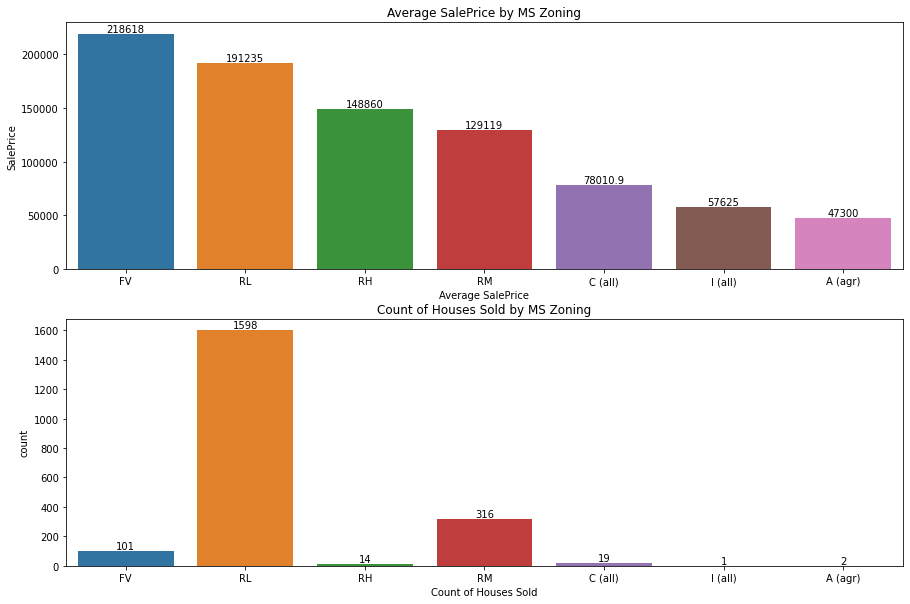

In [21]:
# Looking into the location of the houses sold
fig, axes = plt.subplots(2,1, figsize=(15,10))

df_train_ms_zoning = df_train[["SalePrice", "MS Zoning"]].reset_index(drop=True)
df_train_ms_zoning = (
    df_train_ms_zoning.groupby(["MS Zoning"])["SalePrice"].mean().reset_index()
)

sns.barplot(
    data=df_train_ms_zoning,
    x="MS Zoning",
    y="SalePrice",
    order=df_train_ms_zoning.groupby('MS Zoning')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS Zoning'],
    ci=None,
    ax=ax[0,0]
)
ax[0,0].bar_label(ax1.containers[0])
ax[0,0].set_xlabel("Average SalePrice")
ax[0,0].set_title("Average SalePrice by MS Zoning")

sns.countplot(
    data=df_train,
    x="MS Zoning",
    order=df_train.groupby('MS Zoning')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS Zoning'],
    ax=ax[1,0]
)

ax[1,0].bar_label(ax2.containers[0])
ax[1,0].set_xlabel("Count of Houses Sold")
ax[1,0].set_title("Count of Houses Sold by MS Zoning")
plt.savefig("./charts/Ave and count for MS Zoning.png", bbox_inches='tight')
plt.show()

The graph above shows the average sale price per square feet for the MS Zoning. Among the zoning classes, the sale price per square feet of "Floating Village Residential (FV)" is the highest, as this could be due to the construction's difficultly and their rarity.
On the other hand, the sale price per square feet of "Agriculture", "Industrial" and "Commercial" are the lowest, as this could be due to its location, as it is located in working areas, which could be far away from the city area.

Furthermore, we can see that most of the houses sold belongs to the Residential Low Density (RL) class, which is unexpected from a Singaporean's perspective.

In [22]:
# # Looking into the location of the houses sold
# fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))

# df_train_ms_subclass = df_train[["SalePrice", "MS SubClass"]].reset_index(drop=True)
# df_train_ms_subclass = (
#     df_train_ms_subclass.groupby(["MS SubClass"])["SalePrice"].mean().reset_index()
# )

# sns.barplot(
#     data=df_train_ms_subclass,
#     x="MS SubClass",
#     y="SalePrice",
#     order=df_train_ms_subclass.groupby('MS SubClass')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS SubClass'],
#     ci=None,
#     ax=ax1
# )
# ax1.bar_label(ax1.containers[0])
# ax1.set_xlabel("MS SubClass")
# ax1.set_title("Average SalePrice by MS SubClass")

# sns.countplot(
#     data=df_train,
#     x="MS SubClass",
#     order=df_train.groupby('MS SubClass')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS SubClass'],
#     ax=ax2
# )

# ax2.bar_label(ax2.containers[0])
# ax2.set_xlabel("Count of Houses Sold")
# ax2.set_title("Count of Houses Sold by MS SubClass")
# plt.savefig("./charts/Ave and count for MS SubClass.png", bbox_inches='tight')
# plt.show()

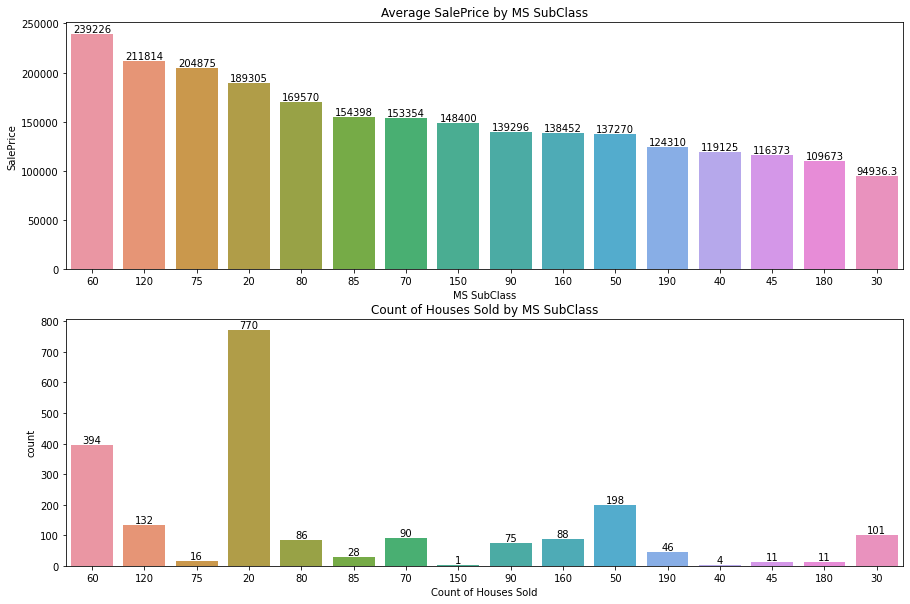

In [23]:
# Looking into the location of the houses sold
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))


sns.barplot(
    data=df_train,
    x="MS SubClass",
    y="SalePrice",
    order=df_train.groupby('MS SubClass')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS SubClass'],
    ci=None,
    ax=ax1
)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("MS SubClass")
ax1.set_title("Average SalePrice by MS SubClass")

sns.countplot(
    data=df_train,
    x="MS SubClass",
    order=df_train.groupby('MS SubClass')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS SubClass'],
    ax=ax2
)

ax2.bar_label(ax2.containers[0])
ax2.set_xlabel("Count of Houses Sold")
ax2.set_title("Count of Houses Sold by MS SubClass")
plt.savefig("./charts/Ave and count for MS SubClass.png", bbox_inches='tight')
plt.show()

Looking at the different types of houses, we can see that most of the houses sold are 1-story 1946 & Newer all styles. 

#### Home Size and Usable Space

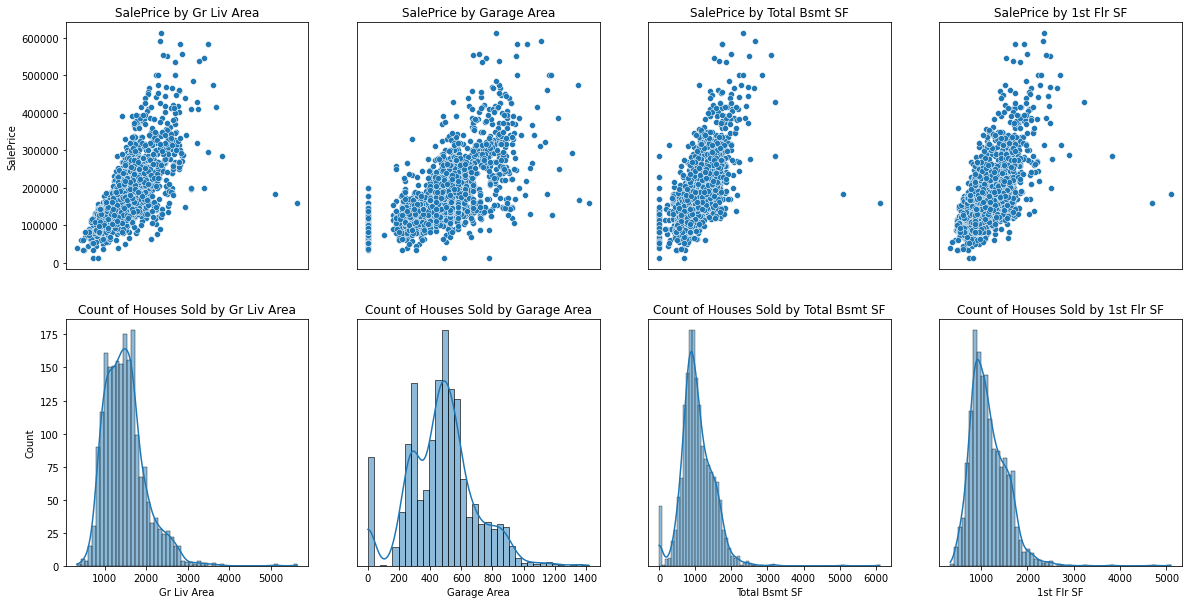

In [24]:
# Looking into the location of the houses sold
fig, axes = plt.subplots(2,4, figsize=(20,10))

# Gr Liv Area
sns.scatterplot(
    data=df_train,
    x="Gr Liv Area",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("SalePrice by Gr Liv Area")

sns.histplot(
    data=df_train,
    x="Gr Liv Area",
    ax=axes[1,0],
    kde=True
)
axes[1,0].set_xlabel("Gr Liv Area")
axes[1,0].set_title("Count of Houses Sold by Gr Liv Area")


# Garage Area
sns.scatterplot(
    data=df_train,
    x="Garage Area",
    y="SalePrice",
    ax=axes[0,1]
)
axes[0,1].get_xaxis().set_visible(False)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Garage Area")

sns.histplot(
    data=df_train,
    x="Garage Area",
    ax=axes[1,1],
    kde=True
)
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Garage Area")
axes[1,1].set_title("Count of Houses Sold by Garage Area")


# Total Bsmt SF
sns.scatterplot(
    data=df_train,
    x="Total Bsmt SF",
    y="SalePrice",
    ax=axes[0,2]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Total Bsmt SF")

sns.histplot(
    data=df_train,
    x="Total Bsmt SF",
    ax=axes[1,2],
    kde=True
)
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Total Bsmt SF")
axes[1,2].set_title("Count of Houses Sold by Total Bsmt SF")


# 1st Flr SF
sns.scatterplot(
    data=df_train,
    x="1st Flr SF",
    y="SalePrice",
    ax=axes[0,3]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by 1st Flr SF")

sns.histplot(
    data=df_train,
    x="1st Flr SF",
    ax=axes[1,3],
    kde=True
)
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("1st Flr SF")
axes[1,3].set_title("Count of Houses Sold by 1st Flr SF")


plt.savefig("./charts/House size.png", bbox_inches='tight')
plt.show()

From the plots above, we can observe that for Gr Liv Area, as mentioned in the data dictionary, does have some outliers in the data. This creates a right skewed of the distribution.
With reference to the other areas, it does also seem to have a right skewed distribution.
But all scatterplots seems to have a linear relationship to the sale price, which is true, that the more the area the house has, the more the saleprice will be.

#### Age and Condition

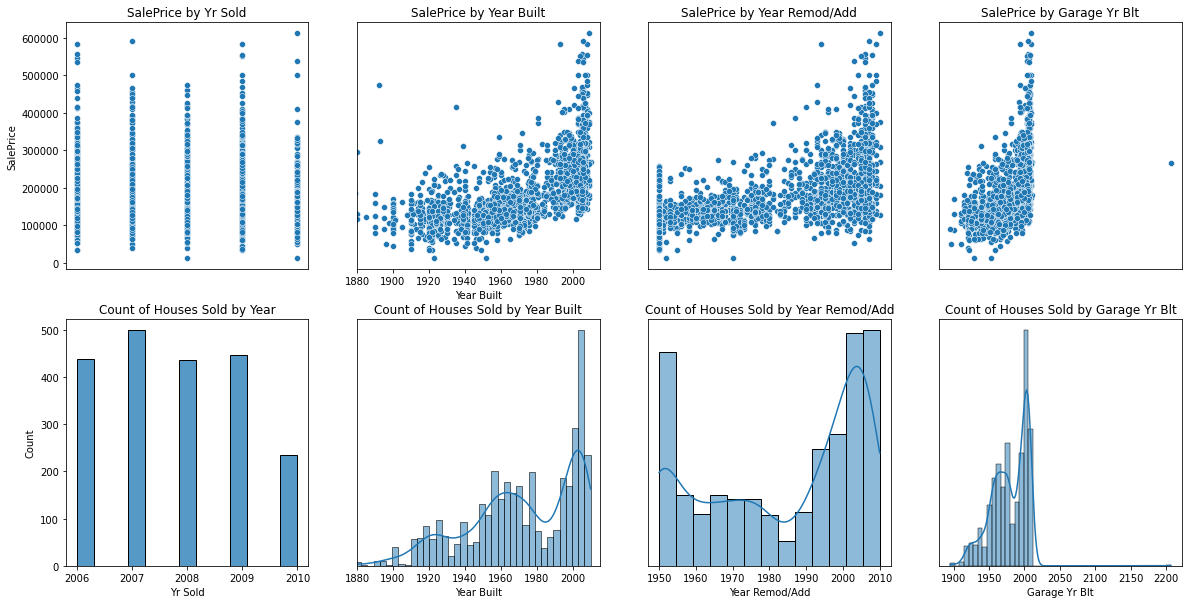

In [25]:
# Looking into the age of the houses sold
fig, axes = plt.subplots(2,4, figsize=(20,10))

# Year Sold
sns.scatterplot(
    data=df_train,
    x="Yr Sold",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("SalePrice by Yr Sold")

sns.histplot(
    data=df_train,
    x="Yr Sold",
    ax=axes[1,0],
    # kde=True
)
axes[1,0].set_xlabel("Yr Sold")
axes[1,0].set_title("Count of Houses Sold by Year")


# Year Built
sns.scatterplot(
    data=df_train,
    x="Year Built",
    y="SalePrice",
    ax=axes[0,1]
)
axes[0,1].set_xlim(1880, 2015)
axes[0,1].get_xaxis().set_visible(True)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Year Built")

sns.histplot(
    data=df_train,
    x="Year Built",
    ax=axes[1,1],
    kde=True,
    bins=40
)
axes[1,1].set_xlim(1880, 2015)
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Year Built")
axes[1,1].set_title("Count of Houses Sold by Year Built")


# Year Remod/Add
sns.scatterplot(
    data=df_train,
    x="Year Remod/Add",
    y="SalePrice",
    ax=axes[0,2]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Year Remod/Add")

sns.histplot(
    data=df_train,
    x="Year Remod/Add",
    ax=axes[1,2],
    kde=True
)
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Year Remod/Add")
axes[1,2].set_title("Count of Houses Sold by Year Remod/Add")


# 1st Flr SF
sns.scatterplot(
    data=df_train,
    x="Garage Yr Blt",
    y="SalePrice",
    ax=axes[0,3]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by Garage Yr Blt")

sns.histplot(
    data=df_train,
    x="Garage Yr Blt",
    ax=axes[1,3],
    kde=True
)
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("Garage Yr Blt")
axes[1,3].set_title("Count of Houses Sold by Garage Yr Blt")


plt.savefig("./charts/Age of Houses Sold.png", bbox_inches='tight')
plt.show()

From the years, it is obvious that the younger the house, the higher the sale price.
It is also noted that there seems to be an outlier in Garage Yr Blt, that will be handled later.

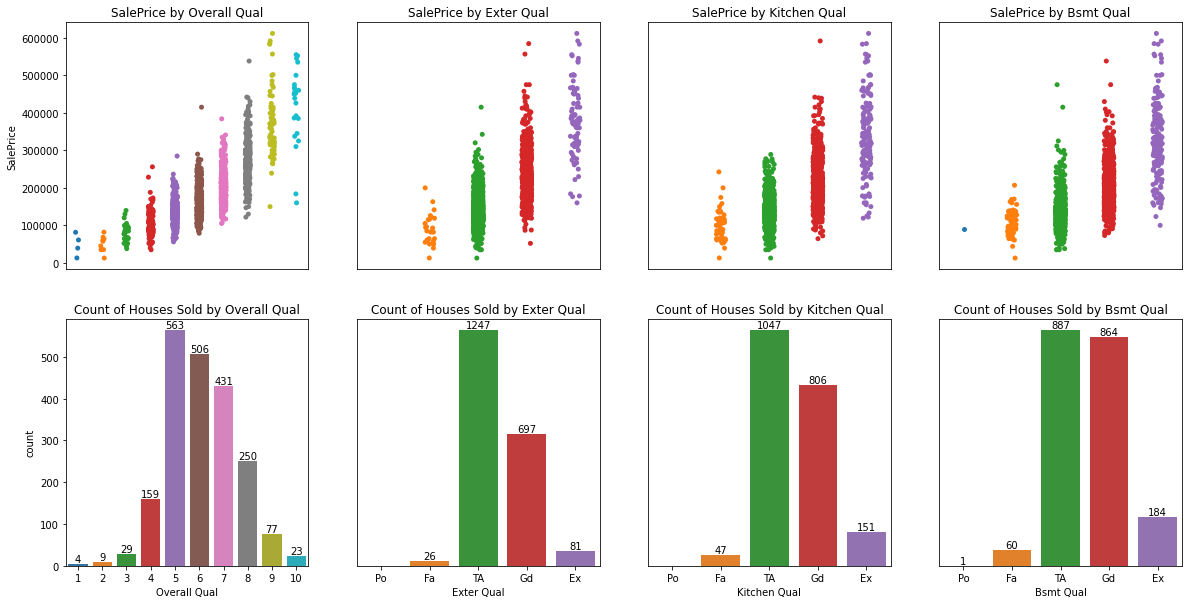

In [26]:
# Looking into the quality of the houses sold
fig, axes = plt.subplots(2,4, figsize=(20,10))

# Overall Qual
sns.stripplot(
    data=df_train,
    x="Overall Qual",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("SalePrice by Overall Qual")

sns.countplot(
    data=df_train,
    x="Overall Qual",
    ax=axes[1,0],
)
axes[1,0].bar_label(axes[1,0].containers[0])
axes[1,0].set_xlabel("Overall Qual")
axes[1,0].set_title("Count of Houses Sold by Overall Qual")


# Exter Qual
sns.stripplot(
    data=df_train,
    x="Exter Qual",
    y="SalePrice",
    ax=axes[0,1],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,1].get_xaxis().set_visible(False)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Exter Qual")

sns.countplot(
    data=df_train,
    x="Exter Qual",
    ax=axes[1,1],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,1].bar_label(axes[1,1].containers[0])
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Exter Qual")
axes[1,1].set_title("Count of Houses Sold by Exter Qual")


# Kitchen Qual
sns.stripplot(
    data=df_train,
    x="Kitchen Qual",
    y="SalePrice",
    ax=axes[0,2],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Kitchen Qual")

sns.countplot(
    data=df_train,
    x="Kitchen Qual",
    ax=axes[1,2],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,2].bar_label(axes[1,2].containers[0])
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Kitchen Qual")
axes[1,2].set_title("Count of Houses Sold by Kitchen Qual")


# 1st Flr SF
sns.stripplot(
    data=df_train,
    x="Bsmt Qual",
    y="SalePrice",
    ax=axes[0,3],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by Bsmt Qual")

sns.countplot(
    data=df_train,
    x="Bsmt Qual",
    ax=axes[1,3],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,3].bar_label(axes[1,3].containers[0])
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("Bsmt Qual")
axes[1,3].set_title("Count of Houses Sold by Bsmt Qual")


plt.savefig("./charts/Quality of Houses Sold.png", bbox_inches='tight')
plt.show()

The Overall Quality is another obvious answer, the higher the qality, the higher the sale price of the house. However, it seems that despite the increasing trend seen, it seems that there is a wide range of sale price in each level of quality.

In [22]:
# Finding the top correlated features with the SalePrice
df_train.corr()['SalePrice'].reset_index().sort_values(by='SalePrice', ascending=False).head()

,index,SalePrice
36,SalePrice,1.000000
3,Overall Qual,0.800207
15,Gr Liv Area,0.697038
26,Garage Area,0.650270
25,Garage Cars,0.648220


## Data Cleaning


### Outliers Removal

As seen from the distribution of the area data in the previous section, because of the right skewed distribution of the Area features, an IQR method will be used for outlier removal.

The IQR method will only be used on the Gr Liv Area, as the data dictionary indicates that there are outliers in the data and also, it is the 2nd highest correlated feature to the SalePrice.

The IQR used will remove the outliers in the Gr Liv Area that are lower than 25 percentile and higher than 75 percentile.


<Figure size 360x360 with 0 Axes>

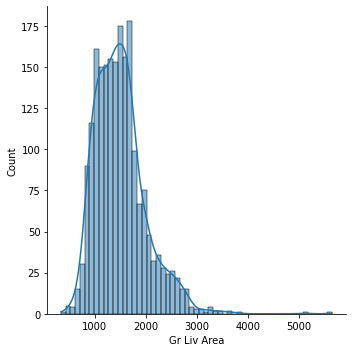

In [23]:
# Distribution of the Gr Liv Area

plt.figure(figsize=(5,5))

sns.displot(
    data=df_train,
    x='Gr Liv Area',
    kde=True
)

plt.show()

The distribution plot of the Gr Liv Area shows a skewed distribution, which is seen to be due to the presence of outliers.
As the distribution is skewed, the outliers removal will be done via the IQR method, which will remove the outliers in the Gr Liv Area that are lower than 25% percentile - IQR*1.5 and higher than 75% percentile + IQR*1.5.

In [24]:
df_train.shape

(2051, 79)

In [25]:
# To determine the IQR range of the data, we need to know the quartile range
Q1 = df_train[["Gr Liv Area"]].quantile(0.25)
Q3 = df_train[["Gr Liv Area"]].quantile(0.75)
IQR = Q3 - Q1


In [26]:
print(Q1 - 1.5 * IQR)
print(Q3 + 1.5 * IQR)


Gr Liv Area    229.75
dtype: float64
Gr Liv Area    2627.75
dtype: float64


In [27]:
df_outliers = df_train.loc[
    (df_train["Gr Liv Area"] < 229.75) | (df_train["Gr Liv Area"] > 2627.75), :
]

In [28]:
# Removing the outliers that are above and below the 1.5 x IQR range for the features that have corr > 0.5
df_train = df_train[
    ~(
        (df_train[["Gr Liv Area"]] < (Q1 - 1.5 * IQR))
        | (df_train[["Gr Liv Area"]] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

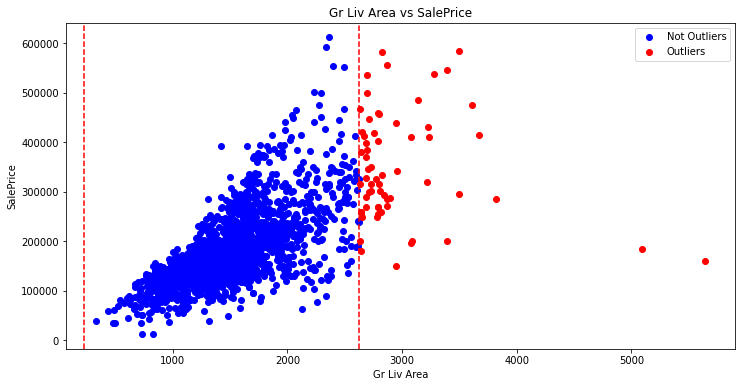

In [29]:
# To showcase the range of the IQR on the scatter plot
plt.figure(figsize=(12, 6))

plt.scatter(data=df_train, x="Gr Liv Area", y="SalePrice", color='b')
plt.scatter(data=df_outliers, x="Gr Liv Area", y="SalePrice", color="r")

plt.xlabel(xlabel="Gr Liv Area")
plt.ylabel(ylabel="SalePrice")
plt.axvline((Q1 - 1.5 * IQR).values, color="r", linestyle="--", label="229.75")
plt.axvline((Q3 + 1.5 * IQR).values, color="r", linestyle="--", label="2627.75")
plt.legend(labels=["Not Outliers", "Outliers"])
plt.grid(False)
plt.title("Gr Liv Area vs SalePrice")


plt.savefig("./charts/Gr Liv Area with outlier shown.png")
plt.show()

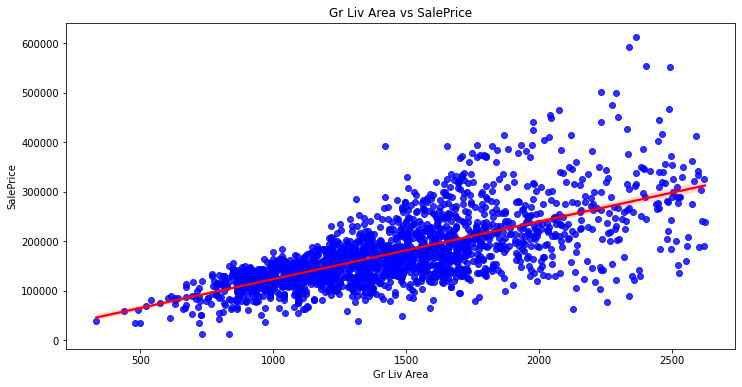

In [30]:
# Showing the new scatter plot of the Gr Liv Area without the outliers
plt.figure(figsize=(12, 6))

# sns.set_style('whitegrid')

sns.regplot(
    data=df_train,
    x="Gr Liv Area",
    y="SalePrice",
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
# plt.scatter(data=df_train, x="Gr Liv Area", y="SalePrice")

plt.title("Gr Liv Area vs SalePrice")
plt.xlabel(xlabel="Gr Liv Area")
plt.ylabel(ylabel="SalePrice")
plt.grid(False)

plt.savefig("./charts/Gr Liv Area without outliers replot.png")
plt.show()

Upon removing the outliers, the distribution of the Gr Liv Area is seen to be more normal, and the scatterplot seems to be more linear.

In [31]:
df_train.shape

(1987, 79)

In [32]:
(2051 - 1987)/2051 * 100

3.1204290589956116

From the IQR outliers removal above, it can be seen that the number of outliers to be removed is 64 rows, which equals to 3.12% of the total number of rows.

The model will be evaluated based on the following values:

1. Gr Liv Area - 229.75 to 2627.75

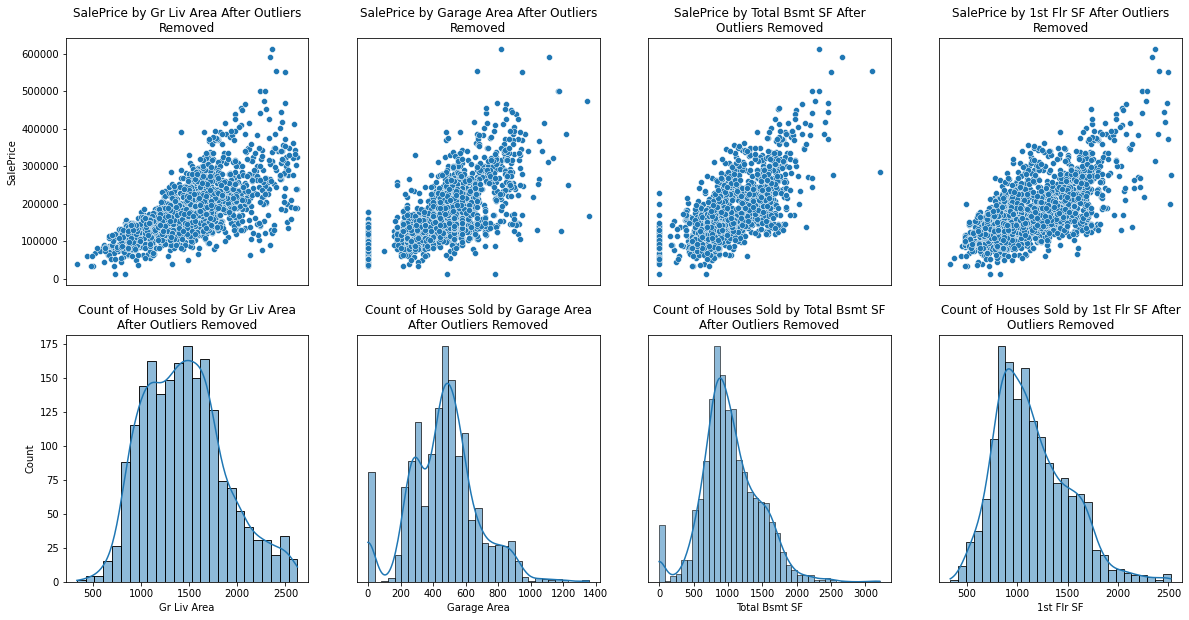

In [33]:
# Relook at how the removal of outliers has affected the other features
from textwrap import wrap

fig, axes = plt.subplots(2,4, figsize=(20,10))

# Gr Liv Area
sns.scatterplot(
    data=df_train,
    x="Gr Liv Area",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("\n".join(wrap("SalePrice by Gr Liv Area After Outliers Removed",40)))

sns.histplot(
    data=df_train,
    x="Gr Liv Area",
    ax=axes[1,0],
    kde=True
)
axes[1,0].set_xlabel("Gr Liv Area")
axes[1,0].set_title("\n".join(wrap("Count of Houses Sold by Gr Liv Area After Outliers Removed",40)))


# Garage Area
sns.scatterplot(
    data=df_train,
    x="Garage Area",
    y="SalePrice",
    ax=axes[0,1]
)
axes[0,1].get_xaxis().set_visible(False)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("\n".join(wrap("SalePrice by Garage Area After Outliers Removed",40)))

sns.histplot(
    data=df_train,
    x="Garage Area",
    ax=axes[1,1],
    kde=True
)
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Garage Area")
axes[1,1].set_title("\n".join(wrap("Count of Houses Sold by Garage Area After Outliers Removed",40)))


# Total Bsmt SF
sns.scatterplot(
    data=df_train,
    x="Total Bsmt SF",
    y="SalePrice",
    ax=axes[0,2]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("\n".join(wrap("SalePrice by Total Bsmt SF After Outliers Removed",40)))

sns.histplot(
    data=df_train,
    x="Total Bsmt SF",
    ax=axes[1,2],
    kde=True
)
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Total Bsmt SF")
axes[1,2].set_title("\n".join(wrap("Count of Houses Sold by Total Bsmt SF After Outliers Removed",40)))


# 1st Flr SF
sns.scatterplot(
    data=df_train,
    x="1st Flr SF",
    y="SalePrice",
    ax=axes[0,3]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("\n".join(wrap("SalePrice by 1st Flr SF After Outliers Removed",40)))

sns.histplot(
    data=df_train,
    x="1st Flr SF",
    ax=axes[1,3],
    kde=True
)
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("1st Flr SF")
axes[1,3].set_title("\n".join(wrap("Count of Houses Sold by 1st Flr SF After Outliers Removed",40)))


plt.savefig("./charts/House size with outliers removed.png", bbox_inches='tight')
plt.show()

The distribution seems to be more normal, and slightly more linear looking. But this will have to do for now, as we have already removed 64 rows of data, removing anymore values may potentially impact the model performance.

In [34]:
df_train.describe(exclude="O")

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1987.000000,1671.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1965.000000,1986.000000,1986.000000,1986.000000,1986.000000,1987.000000,1987.000000,1987.000000,1987.000000,1986.000000,1986.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1875.000000,1986.000000,1986.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,56.789129,68.260323,9872.854051,6.055360,5.564167,1971.360845,1983.830901,91.414249,432.059416,46.573515,560.434542,1039.067472,1143.195269,303.990941,4.702567,1451.888777,0.420443,0.061934,1.553095,0.352793,2.807750,1.042275,6.326120,0.565677,1978.258667,1.748741,464.791541,89.889280,45.437846,22.510317,2.674887,15.376447,1.454957,43.094615,6.211374,2007.781580,176145.174635
std,43.147588,22.128311,6526.420402,1.390138,1.099430,30.080492,21.171638,160.683036,437.204833,158.941682,437.020793,415.727864,360.650770,398.691001,46.991006,421.532771,0.518635,0.247285,0.532503,0.492487,0.793529,0.208636,1.429208,0.619497,25.578572,0.748339,209.669818,123.663134,63.177012,59.739450,25.628553,54.271039,29.618782,438.253418,2.745978,1.314419,72077.744473
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,57.000000,7431.500000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,218.000000,784.000000,874.000000,0.000000,0.000000,1120.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,50.000000,67.000000,9308.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,360.500000,0.000000,470.000000,986.500000,1078.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1979.000000,2.000000,477.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11340.000000,7.000000,6.000000,2001.000000,2004.000000,145.000000,724.250000,0.000000,801.750000,1288.000000,1368.000000,672.000000,0.000000,1701.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,162.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,208950.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1127.000000,2336.000000,3206.000000,2524.000000,1611.000000,1064.000000,2624.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,13.000000,3.000000,2207.000000,5.000000,1356.000000,1424.000000,523.000000,432.000000,508.000000,490.000000,738.000000,12500.000000,12.000000,2010.000000,611657.000000


In [35]:
df_test.describe(exclude="O")

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Data Cleaning of the values, plus taking a look at the null values

In [36]:
# From the describe of the train data above and the plots in the earlier section, we can see that there is extremely large value for Garage Yr Blt
df_train.loc[
    df_train["Garage Yr Blt"] > 2010.0,
    ["Year Built", "Year Remod/Add", "Garage Yr Blt"],
]


,Year Built,Year Remod/Add,Garage Yr Blt
Id,,,
2261,2006,2007,2207.0


In [37]:
# As it was found that the year remod/add for this row is in 2007, taking that the garage was built during the remod, the garage yr blt will be changed to 2007
df_train.loc[df_train["Garage Yr Blt"] > 2010.0, "Garage Yr Blt"] = 2007.0

In [38]:
def null(df):
    """
    Function to give a dataframe of the null value counts/percent and dtype
    """
    ms_count = df.isna().sum().sort_values(ascending=False)
    ms_percent = df.isnull().sum().sort_values(ascending=False) / len(df) * 100
    ms_dtypes = df[
        df.isnull().sum().sort_values(ascending=False).index.to_list()
    ].dtypes
    ms_values = pd.concat([ms_count, ms_percent, ms_dtypes], axis=1)
    ms_values.columns = ["count", "percent", "dtype"]

    return ms_values.loc[ms_values["percent"] > 0, :]

In [39]:
null(df_train)


,count,percent,dtype
Pool QC,1982,99.748364,object
Misc Feature,1925,96.879718,object
Alley,1849,93.054857,object
Fence,1596,80.322094,object
Fireplace Qu,997,50.176145,object
Lot Frontage,316,15.903372,float64
Garage Yr Blt,112,5.636638,float64
Garage Qual,112,5.636638,object
Garage Cond,112,5.636638,object
Garage Finish,112,5.636638,object


In [40]:
null(df_test)

,count,percent,dtype
Pool QC,874,99.544419,object
Misc Feature,837,95.330296,object
Alley,820,93.394077,object
Fence,706,80.410023,object
Fireplace Qu,422,48.063781,object
Lot Frontage,160,18.223235,float64
Garage Yr Blt,45,5.125285,float64
Garage Finish,45,5.125285,object
Garage Qual,45,5.125285,object
Garage Cond,45,5.125285,object


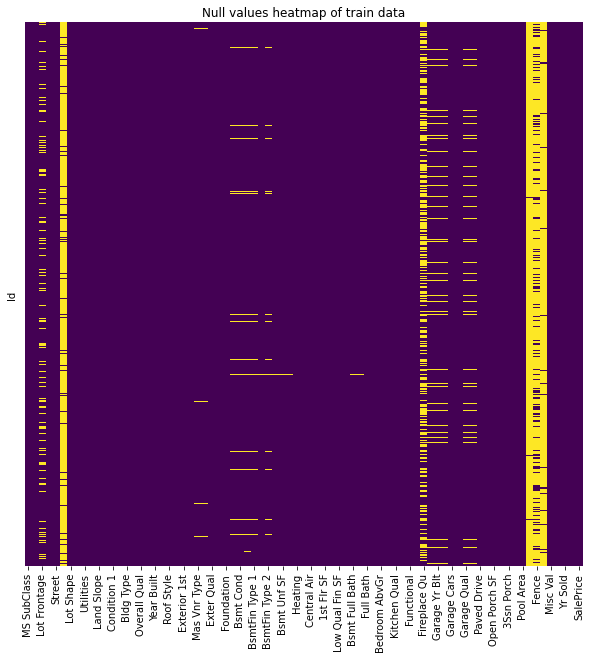

In [41]:
cols = df_train.isna().columns.to_list()
# Visualization of the null values heatmap
plt.figure(figsize=(10,10))

sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Null values heatmap of train data")
plt.savefig("./charts/null values heatmap of train.png")
plt.show()

# plt.figure(figsize=(10,10))

# sns.heatmap(df_test[cols].isnull(),yticklabels=False,cbar=False,cmap='viridis')
# plt.title("Null values heatmap of test data")
# plt.show()

The heatmap above shows that the null values for Garage and Bsmt related columns seem to have the null values at the same rows.

Looking at the counts of the null values, those features with percentage of null values above 20% will be investigated to see if they can be removed.

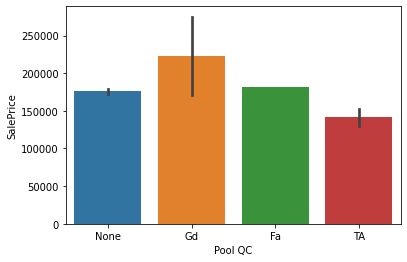

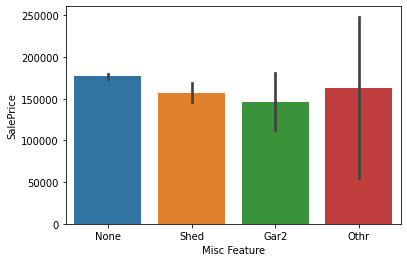

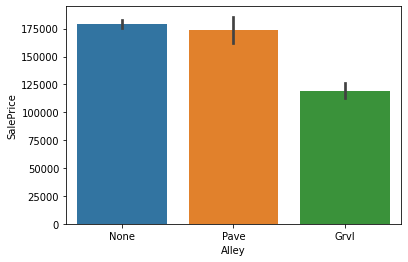

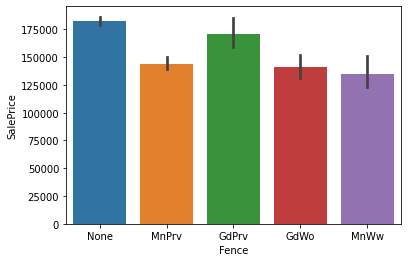

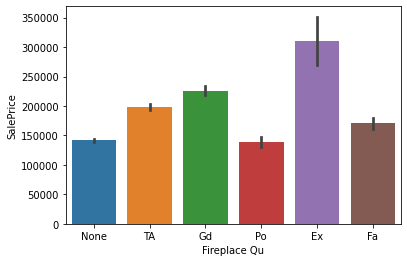

In [42]:
cols = ["Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu"]
df_train_copy = df_train.copy()

for col in cols:
    df_train_copy[col] = df_train_copy[col].fillna("None")

    sns.barplot(
        data=df_train_copy,
        x=col,
        y="SalePrice",
        # hue="Overall Qual",
        # palette="Set2",
    )
    plt.show()

In [43]:
# Mean difference in having the missing features and not having them
cols = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu']

for col in cols:
    s = (
        df_train.groupby(df_train[col].notna())["SalePrice"]
        .agg(np.mean)
        .reset_index()
    )

    perc_diff = (
        (
            s.loc[s[col] == True, "SalePrice"].values
            - s.loc[s[col] == False, "SalePrice"].values
        )
        / s.loc[s[col] == False, "SalePrice"].values
    ) * 100

    print(
        f"The percent difference between having a {col} and not having {col} is {perc_diff}%."
    )

The percent difference between having a Pool QC and not having Pool QC is [3.32911273]%.
The percent difference between having a Misc Feature and not having Misc Feature is [-11.255992]%.
The percent difference between having a Alley and not having Alley is [-21.31387492]%.
The percent difference between having a Fence and not having Fence is [-18.51359851]%.
The percent difference between having a Fireplace Qu and not having Fireplace Qu is [48.68970414]%.


Diving deeper into the null values, it seems that:

- having a Pool - increases the sale price on an average of 16%
- No misc features
- No alley
- No fence
- having a fireplace - increases the sale price on an average of 54%

gives a better average sale price. 

However, the columns will not be dropped, as the null values does not post a major impact on the sale price, as the data dictionary states there these null values is the absence of that particular feature.

#### Null values in Garage related columns

Further investigation of the difference of null value counts for some of the related columns.

In [44]:
# Garage Type has 1 lesser count as compared to the other garage values in df_train

df_train.loc[
    (df_train["Garage Finish"].isna()) & (df_train["Garage Type"].notna()),
    [
        "Garage Cond",
        "Garage Qual",
        "Garage Yr Blt",
        "Garage Type",
        "Garage Area",
        "Year Remod/Add",
        "Year Built",
    ],
]

,Garage Cond,Garage Qual,Garage Yr Blt,Garage Type,Garage Area,Year Remod/Add,Year Built
Id,,,,,,,
2237,NaN,NaN,NaN,Detchd,NaN,1999,1923


In [45]:
# Changing the Garage Type to Nan if the other columns are NaN
df_train.loc[
    (df_train["Garage Finish"].isna()) & (df_train["Garage Type"].notna()),
    "Garage Type",
] = np.nan


For the above row, even though there is a Garage Type, the other rows show NaN, which most likely would be 'NA'. However, if there is no garage, there should not be a Garage Type.


In [46]:
# Garage Type has 1 lesser count as compared to the other garage values in df_test

df_test.loc[
    (df_test["Garage Finish"].isna()) & (df_test["Garage Type"].notna()),
    [
        "Garage Finish",
        "Garage Cond",
        "Garage Qual",
        "Garage Yr Blt",
        "Garage Type",
        "Garage Area",
        "Year Remod/Add",
        "Year Built",
    ],
]


,Garage Finish,Garage Cond,Garage Qual,Garage Yr Blt,Garage Type,Garage Area,Year Remod/Add,Year Built
Id,,,,,,,,
1357,NaN,NaN,NaN,NaN,Detchd,360,1983,1910


In [47]:
df_test.groupby("Garage Type")[
    ["Garage Cond", "Garage Qual", "Garage Finish"]
].value_counts()

Garage Type  Garage Cond  Garage Qual  Garage Finish
2Types       TA           TA           Fin                1
                                       RFn                1
                                       Unf                1
                          Fa           Unf                1
Attchd       TA           TA           RFn              205
                                       Fin              166
                                       Unf              136
             Fa           TA           Unf                3
             TA           Fa           Unf                3
                          Gd           RFn                3
             Gd           TA           RFn                1
             TA           Gd           Unf                1
Basment      TA           TA           Unf                6
                                       RFn                2
                                       Fin                1
BuiltIn      TA           TA           Fin     

In [48]:
# Changing the Garage Cond, Garage Qual to the most frequent value in df_test
df_test.loc[
    (df_test["Garage Finish"].isna()) & (df_test["Garage Type"].notna()),
    ["Garage Cond", "Garage Qual"],
] = "TA"

# Garage Yr Blt will be assumed to be built at the same time as the year remod/add
df_test.loc[
    (df_test["Garage Finish"].isna()) & (df_test["Garage Type"].notna()),
    ["Garage Yr Blt"],
] = 1910

# Changing the Garage Finish to the most frequent value
df_test.loc[
    (df_test["Garage Finish"].isna()) & (df_test["Garage Type"].notna()),
    ["Garage Finish"],
] = "Unf"

In [49]:
df_test.reset_index().loc[df_test.reset_index()["Id"] == 1357, :]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
764,1357,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,1910.0,Unf,1,360,TA,TA,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


#### Null values in Bsmt related columns

In [50]:
# Bsmt Exposure has 2 more null values

# Checking on the different number of NaN values for Bsmt Exposure to Bsmt Qual, Bsmt Cond BsmtFin Type 1 and BsmtFin Type 2

df_train.loc[
    (df_train["Bsmt Exposure"].isna()) & (df_train["BsmtFin Type 1"].notna()),
    ["Bsmt Exposure", "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 2"],
]


,Bsmt Exposure,BsmtFin Type 1,Bsmt Qual,Bsmt Cond,BsmtFin Type 2
Id,,,,,
1797,NaN,Unf,Gd,TA,Unf
67,NaN,Unf,Gd,TA,Unf
2780,NaN,Unf,Gd,TA,Unf


In [51]:
# As the common factor seems to be Unf for BsmtFin Type 1 and BSmtFin Type 2
#  With reference to the values from other similar rows

df_train.loc[
    (df_train["BsmtFin Type 2"] == "Unf") & (df_train["BsmtFin Type 1"] == "Unf"),
    ["Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"],
]["Bsmt Exposure"].value_counts(dropna=False)


No     472
Av      60
Mn      40
Gd      14
NaN      3
Name: Bsmt Exposure, dtype: int64

In [52]:
# The Bsmt Exposure will be changed to the most frequent value, as there could not be NA, which means that there is no basement, as the other columns like Bsmtfin type 1 and bsmt cond are not null values.
for c in combine:
    c.loc[
        (c["Bsmt Exposure"].isna()) & (c["BsmtFin Type 1"].notna()), ["Bsmt Exposure"]
    ] = "No"

In [53]:
null(df_train)


,count,percent,dtype
Pool QC,1982,99.748364,object
Misc Feature,1925,96.879718,object
Alley,1849,93.054857,object
Fence,1596,80.322094,object
Fireplace Qu,997,50.176145,object
Lot Frontage,316,15.903372,float64
Garage Yr Blt,112,5.636638,float64
Garage Qual,112,5.636638,object
Garage Cond,112,5.636638,object
Garage Type,112,5.636638,object


## Feature Processing


In [54]:
df_train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

<AxesSubplot:>

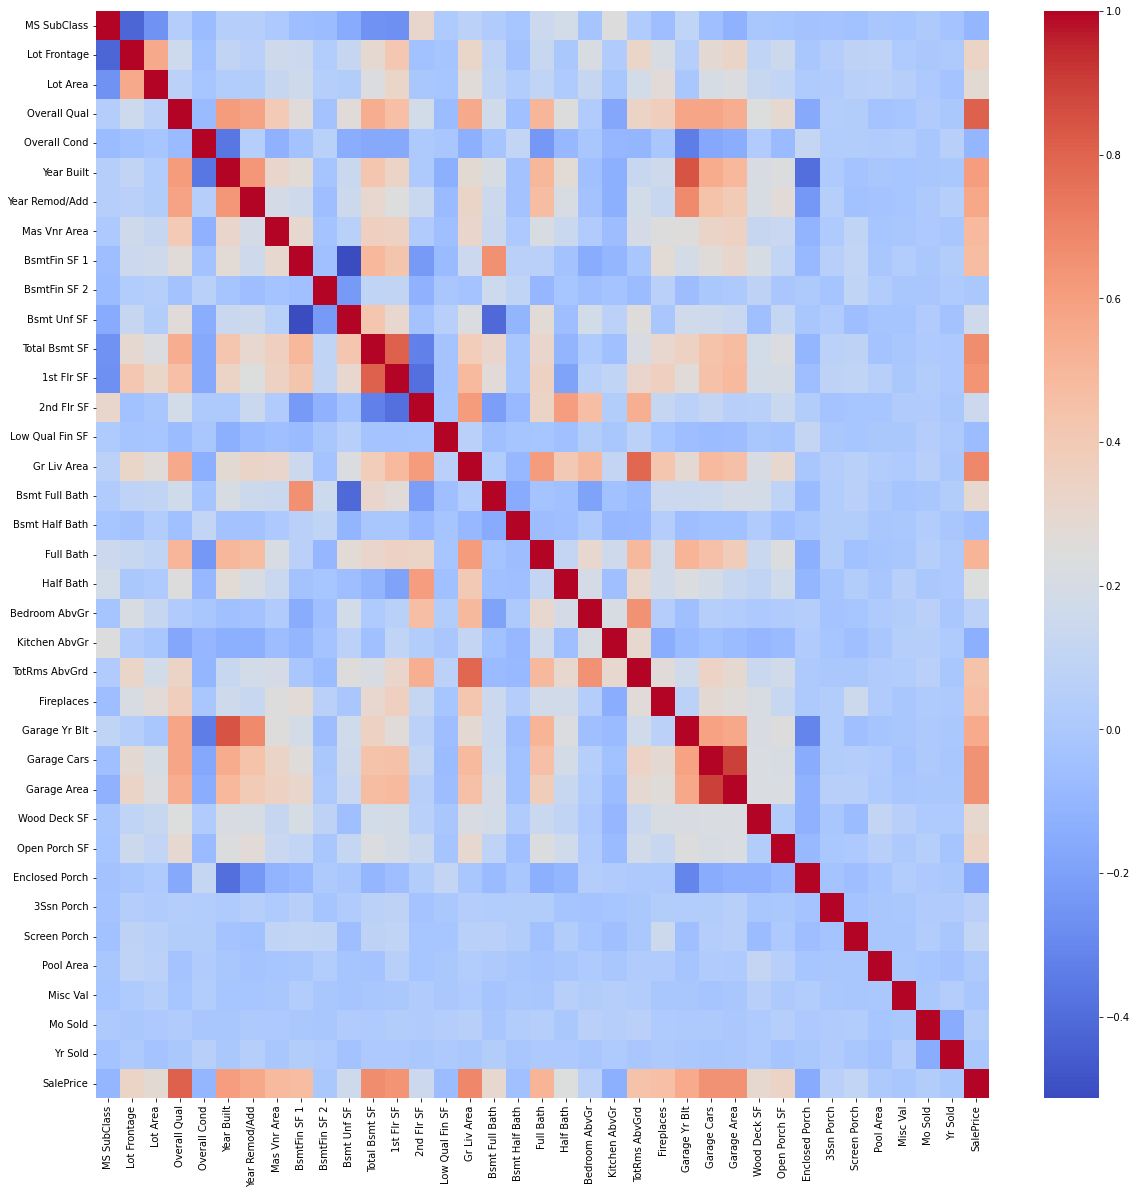

In [55]:
# Looking at the general heatmap of all the variables
plt.figure(figsize=(20, 20))

# Heatmap visualisation of the correlation between the variables
sns.heatmap(
    data=df_train.corr(),
    cmap="coolwarm",
)

As the heatmap above is too big, the features will be reduced to a smaller set of features, where the variables with higher coorelation will be further investigated.

In [56]:
# Extraction of the variables with high correlation
df_corr = df_train.corr()
high_correlation_variables = df_corr.index[abs(df_corr["SalePrice"]) > 0.4]
# high_correlation_variables


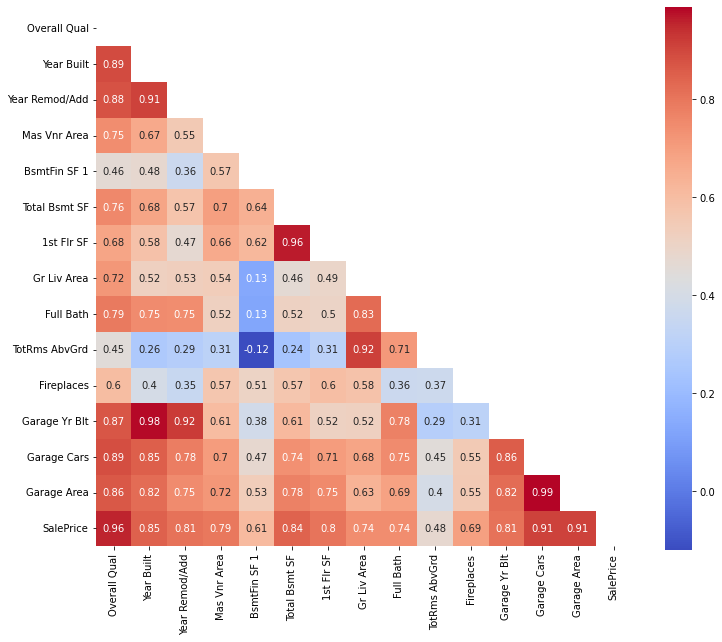

In [57]:
# Heatmap of the high correlation variables
corr = df_corr[high_correlation_variables].corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, square=True)
ax.tick_params(labelsize=10)

plt.savefig("./charts/high_correlation_variables.png")
plt.show()

### Plotting of the high correlation between the features

#### Garage related columns


<Figure size 360x360 with 0 Axes>

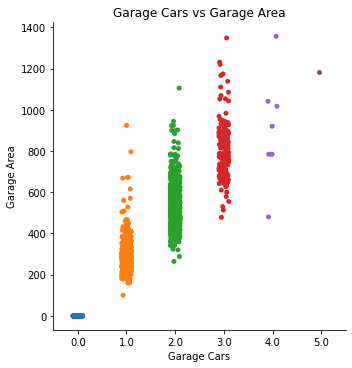

In [58]:
# Garage Cars vs Garage Area
plt.figure(figsize=(5, 5))

sns.catplot(
    data=df_train,
    x='Garage Cars',
    y='Garage Area',
    # hue='Overall Qual',
    # palette='viridis',
)

plt.title("Garage Cars vs Garage Area")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./charts/Garage Cars vs Garage Area.png', bbox_inches='tight')
plt.show()

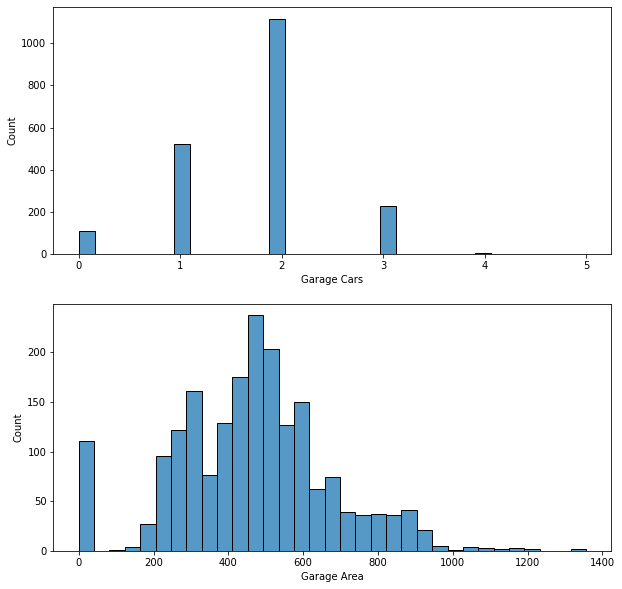

In [59]:
# Garage Cars vs Garage Area

fig, ax = plt.subplots(2,1, figsize=(10,10))

# plt.figure(figsize=(5, 5))

sns.histplot(
    data=df_train,
    x='Garage Cars',
    # y='Garage Area',
    # hue='Overall Qual',
    palette='viridis',
    ax=ax[0]
)

sns.histplot(
    data=df_train,
    x='Garage Area',
    # y='Garage Area',
    # hue='Overall Qual',
    palette='viridis',
    ax=ax[1]
)

# plt.title("Garage Cars vs Garage Area")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('./charts/Garage Cars vs Garage Area distribution.png', bbox_inches='tight')
plt.show()

From the data dict, Garage Cars is the size of the garage in car capacity, and the Garage Area is the size of the garage.
It will make sense that the larger the garage area, the more cars can be fit. Furthermore, the scatterplot also shows that some larger garage area can fit lesser cars than the smaller garage area. This could depend on the configuartion of the garage.
As they roughly mean the same thing, the Garage Cars column will be dropped, as the Garage Area is a better measure of the size of the garage.


In [60]:
# Null value found in Garage Area and Garage Car
df_train.loc[
    df_train["Garage Area"].isna(),
    ["Garage Cars", "Garage Area"],
]


,Garage Cars,Garage Area
Id,,
2237,NaN,NaN


In [61]:
# There is a null value for both Garage Area and Garage Car. That null value will replaced with 0 to indicate no garage area as there is a null value for Garage Cars too.

df_train[["Garage Area", "Garage Cars"]] = df_train[
    ["Garage Area", "Garage Cars"]
].fillna(0)
df_test[["Garage Area", "Garage Cars"]] = df_test[
    ["Garage Area", "Garage Cars"]
].fillna(0)

/tmp/ipykernel_433885/359891484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[["Garage Area", "Garage Cars"]] = df_train[


In [62]:
# Drop of Garage Car features
df_train = df_train.drop(columns=["Garage Cars"])
df_test = df_test.drop(columns=["Garage Cars"])

#### Gross Living Area related columns

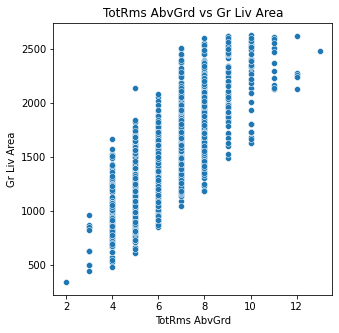

In [63]:
# TotRms AbvGrd vs Gr Liv Area
plt.figure(figsize=(5, 5))

sns.scatterplot(
    data=df_train,
    y="Gr Liv Area",
    x="TotRms AbvGrd",
    # hue="Overall Qual",
    # palette="viridis",
)

plt.title("TotRms AbvGrd vs Gr Liv Area")
plt.savefig("./charts/TotRms AbvGrd vs Gr Liv Area.png", bbox_inches="tight")
plt.show()


The above scatter plot confirms the thinking that the larger the Gr Liv Area, the more rooms there are in the house.


Looking at different 'similar' features in relation to Gr Liv Area


In [64]:
# Looking into the Gr Liv Area, 1st Flr SF and 2nd Flr SF
df_train.loc[:, ["Gr Liv Area", "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF"]]

,Gr Liv Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF
Id,,,,
109,1479,725,754,0
544,2122,913,1209,0
153,1057,1057,0,0
318,1444,744,700,0
255,1445,831,614,0
...,...,...,...,...
1587,1728,1728,0,0
785,861,861,0,0
916,1913,1172,741,0


In [65]:
# It seems that the Gr Liv Area is the sum of 1st Flr SF and 2nd Flr SF
# Further investigation will be done to ensure that the above statement is correct.
df_train = df_train.assign(
    total_living_area=df_train["1st Flr SF"]
    + df_train["2nd Flr SF"]
    + df_train["Low Qual Fin SF"]
)

df_train["Diff"] = np.where(
    df_train["total_living_area"] == df_train["Gr Liv Area"], "1", "0"
)


In [66]:
df_train.loc[(df_train["Diff"] == "0"), ["total_living_area", "Gr Liv Area"]]

,total_living_area,Gr Liv Area
Id,,


The values for Gr Liv Area are equal to the sum of 1st Flr SF, 2nd Flr SF and Low Qual Fin SF.
Hence, the 1st Flr SF, 2nd Flr SF and Low Qual Fin SF will be dropped.


In [67]:
df_train = df_train.drop(columns=["total_living_area", "Diff"])


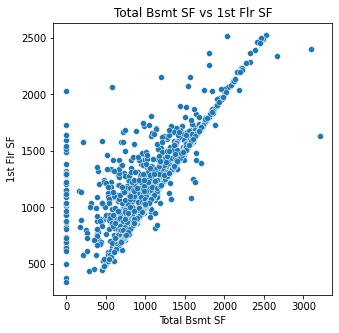

In [68]:
plt.figure(figsize=(5, 5))

sns.scatterplot(
    data=df_train,
    x='Total Bsmt SF',
    y='1st Flr SF',
)

plt.title("Total Bsmt SF vs 1st Flr SF")
plt.savefig('./charts/Total Bsmt SF vs 1st Flr SF.png', bbox_inches='tight')
plt.show()

There seems to be a linear relationship between the Total Bsmt SF and the 1st Flr SF.
This could be because that the basement area can mostly be as large as the 1st floor SF.

In [69]:
# Dropping of columns that were used to combine for both df_train and df_test
df_train = df_train.drop(columns=["1st Flr SF", "2nd Flr SF", "Low Qual Fin SF"])

df_test = df_test.drop(columns=["1st Flr SF", "2nd Flr SF", "Low Qual Fin SF"])


#### Year related columns

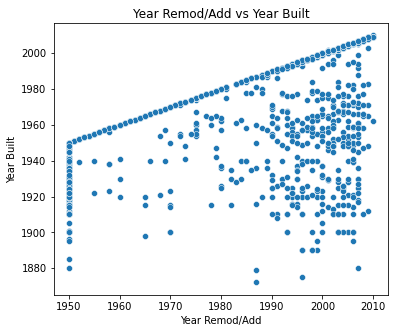

In [70]:
# fig, ax = plt.subplots(2,1, figsize=(10, 10))
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_train,
    x='Year Remod/Add',
    y='Year Built',
)

plt.title("Year Remod/Add vs Year Built")
plt.savefig('./charts/Year Remod vs Year Built.png', bbox_inches='tight')
plt.show()

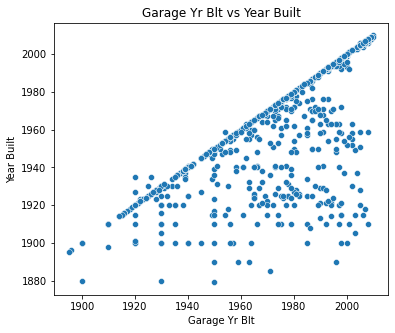

In [71]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_train,
    x='Garage Yr Blt',
    y='Year Built',
)
plt.title("Garage Yr Blt vs Year Built")
plt.savefig('./charts/Garage Yr Blt vs Year Built.png', bbox_inches='tight')
plt.show()

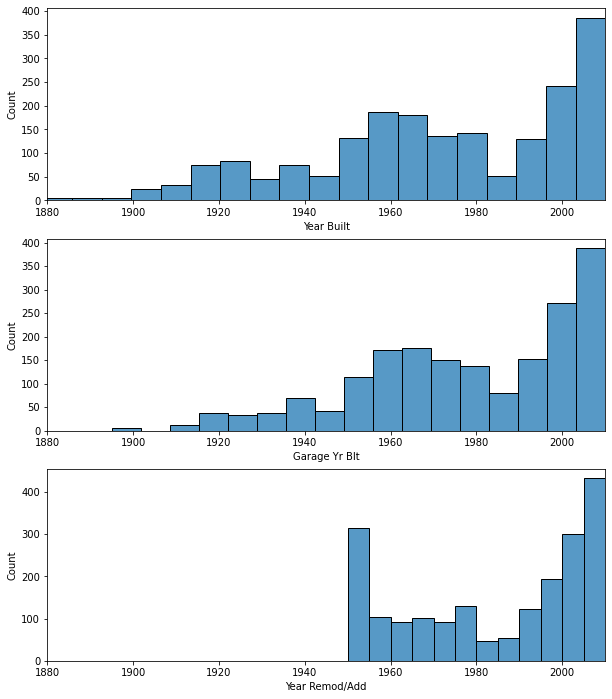

In [72]:
fig, ax = plt.subplots(3,1, figsize=(10, 12))
sns.histplot(
    data=df_train,
    x='Year Built',
    palette='viridis',
    bins=20,
    ax=ax[0]
)
ax[0].set_xlim(1880, 2010)

sns.histplot(
    data=df_train,
    x='Garage Yr Blt',
    palette='viridis',
    ax=ax[1]
)
ax[1].set_xlim(1880, 2010)

sns.histplot(
    data=df_train,
    x='Year Remod/Add',
    palette='viridis',
    ax=ax[2]
)
ax[2].set_xlim(1880, 2010)

plt.savefig('./charts/3 chart distribution - year built garage yr blt and Year Remod.png')
plt.show()

From the scatter plots and the distribution plots above, Garage Yr Blt will be dropped, as it seems that there are some houses whose Garage is built before the house was built. This does not make sense, and furthermore, Garage Yr Blt has the same coeff as Year Remod/Add. Based on the problem statement, it is more sensible to use Year Remod/Add. Hence, the Garage Yr Blt column will be dropped.

In [73]:
# Garage Yr Blt will also be dropped as it is highly corelated with the Year Built to reduce multicollinearity and in addition, the Garage Yr Blt is either the year the house was built or the year it was remodeled.
df_train = df_train.drop(columns=["Garage Yr Blt"])
df_test = df_test.drop(columns=["Garage Yr Blt"])


In addition, the year sold column will be used to create the age of the house feature. This will be done with the Year Built and Year Remod/Add features.

In [74]:
# Creation of age at sale column by using the year sold - year built
df_train["age_sold"] = df_train.apply(
    lambda x: x["Yr Sold"] - x["Year Built"]
    if (x["Year Built"] < x["Year Remod/Add"])
    else (x["Yr Sold"] - x["Year Remod/Add"]),
    axis=1,
)

df_test["age_sold"] = df_test.apply(
    lambda x: x["Yr Sold"] - x["Year Built"]
    if (x["Year Built"] < x["Year Remod/Add"])
    else (x["Yr Sold"] - x["Year Remod/Add"]),
    axis=1,
)

In [75]:
# Dropping of Yr Sold feature

df_train = df_train.drop(
    columns=["Yr Sold", "Year Built", "Year Remod/Add"]
)

df_test = df_test.drop(
    columns=["Yr Sold", "Year Built", "Year Remod/Add"]
)

#### Bsmt related columns


In [76]:
# Looking into the Bsmt features
df_train.loc[:, ["Total Bsmt SF", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"]]

,Total Bsmt SF,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF
Id,,,,
109,725.0,533.0,0.0,192.0
544,913.0,637.0,0.0,276.0
153,1057.0,731.0,0.0,326.0
318,384.0,0.0,0.0,384.0
255,676.0,0.0,0.0,676.0
...,...,...,...,...
1587,1884.0,1011.0,0.0,873.0
785,861.0,262.0,0.0,599.0
916,896.0,0.0,0.0,896.0


In [77]:
# It seems that the Total Bsmt SF is the sum of the BsmtFin SF 1, BsmtFin SF 2 and the Bsmt Unf SF
# Further investigation to ensure that the above statement is correct.
df_train = df_train.assign(
    total_bsmt_area=df_train["BsmtFin SF 1"]
    + df_train["BsmtFin SF 2"]
    + df_train["Bsmt Unf SF"]
)


df_train["Diff"] = np.where(
    df_train["total_bsmt_area"] == df_train["Total Bsmt SF"], "1", "0"
)

df_train.loc[(df_train["Diff"] == "0"), ["total_bsmt_area", "Total Bsmt SF"]]

,total_bsmt_area,Total Bsmt SF
Id,,
1342,NaN,NaN


In [78]:
# The null value above will be replaced with 0
df_train.loc[
    (df_train["Total Bsmt SF"].isna()),
    ["Total Bsmt SF", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"],
] = 0

The total Bsmt SF is the sum of the Bsmt SF1, Bsmt SF2 and Bsmt Unf. Hence, only the total Bsmt SF feature will be kept, the other features will be dropped.

In [79]:
df_train = df_train.drop(columns=["total_bsmt_area", "Diff"])

df_train = df_train.drop(columns=["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"])

df_test = df_test.drop(columns=["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"])

#### Baths related columns


As there is a TotsRms AbvGrd column, which does not contains the bathroom count, a feature with total bathrooms will be created.

In [80]:
df_train.loc[
    :,
    ['Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath']
]

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath
Id,,,,
109,0.0,0.0,2,1
544,1.0,0.0,2,1
153,1.0,0.0,1,0
318,0.0,0.0,2,1
255,0.0,0.0,2,0
...,...,...,...,...
1587,1.0,0.0,2,0
785,0.0,0.0,1,0
916,0.0,0.0,1,1


In [81]:
# TotsRms AbvGrd is the total rooms above grade, does not include bathrooms
# Creation of new feature to add up the total bathrooms

# Replacing the null values in Bsmt Half Bath and Bsmt Full Bath with 0
df_train["Bsmt Half Bath"].replace(np.nan, 0, inplace=True)
df_train["Bsmt Full Bath"].replace(np.nan, 0, inplace=True)

df_test["Bsmt Half Bath"].replace(np.nan, 0, inplace=True)
df_test["Bsmt Full Bath"].replace(np.nan, 0, inplace=True)


df_train = df_train.assign(
    total_bathrooms=df_train["Bsmt Full Bath"]
    + df_train["Bsmt Half Bath"] * 0.5
    + df_train["Full Bath"]
    + df_train["Half Bath"] * 0.5
)

df_test = df_test.assign(
    total_bathrooms=df_test["Bsmt Full Bath"]
    + df_test["Bsmt Half Bath"] * 0.5
    + df_test["Full Bath"]
    + df_test["Half Bath"] * 0.5
)


In [82]:
df_train = df_train.drop(
    columns=["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"]
)

df_test = df_test.drop(
    columns=["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"]
)

#### Porch related columns


All the porch will be added up to become total porch area.

In [83]:
df_train = df_train.assign(
    total_porch_area=df_train["Open Porch SF"]
    + df_train["Enclosed Porch"]
    + df_train["3Ssn Porch"]
    + df_train["Screen Porch"]
)

df_test = df_test.assign(
    total_porch_area=df_test["Open Porch SF"]
    + df_test["Enclosed Porch"]
    + df_test["3Ssn Porch"]
    + df_test["Screen Porch"]
)

In [84]:
df_train = df_train.drop(
    columns=["Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch"]
)

df_test = df_test.drop(
    columns=["Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch"]
)

### Filling in the missing data for categorical and ordinal variables


In [85]:
null(df_train)


,count,percent,dtype
Pool QC,1982,99.748364,object
Misc Feature,1925,96.879718,object
Alley,1849,93.054857,object
Fence,1596,80.322094,object
Fireplace Qu,997,50.176145,object
Lot Frontage,316,15.903372,float64
Garage Qual,112,5.636638,object
Garage Type,112,5.636638,object
Garage Finish,112,5.636638,object
Garage Cond,112,5.636638,object


In [86]:
# Replace the 'None' in Mas Vnr Type
df_train["Mas Vnr Type"].replace(to_replace=["None"], value="NA", inplace=True)
df_test["Mas Vnr Type"].replace(to_replace=["None"], value="NA", inplace=True)

# Replace the null in the Mas Vnr Area with 0
df_train["Mas Vnr Area"].replace(to_replace=np.nan, value=0, inplace=True)
df_test["Mas Vnr Area"].replace(to_replace=np.nan, value=0, inplace=True)

cols = df_train.select_dtypes(include=["object"]).columns.to_list()

imp_na = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="NA")
df_train[cols] = imp_na.fit_transform(df_train[cols])
df_test[cols] = imp_na.transform(df_test[cols])

In [87]:
null(df_train)


,count,percent,dtype
Lot Frontage,316,15.903372,float64


## Feature Transformation


In [88]:
# ordinal columns transformation

cols = [
    "Exter Qual",
    "Exter Cond",
    "Bsmt Qual",
    "Bsmt Cond",
    "Heating QC",
    "Kitchen Qual",
    "Fireplace Qu",
    "Garage Qual",
    "Garage Cond",
    "Pool QC",
]

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[["NA", "Po", "Fa", "TA", "Gd", "Ex"]])

# enc.fit(df_train[["Exter Qual"]])

for col in cols:
    enc.fit(df_train[[col]])
    df_train[col] = enc.transform(df_train[[col]])
    df_test[col] = enc.transform(df_test[[col]])


In [89]:
my_dict = {
    "Lot Shape": {"Reg": 4, "IR1": 3, "IR2": 2, "IR3": 1},
    "Utilities": {"AllPub": 4, "NoSewr": 3, "NoSeWa": 2, "ELO": 1},
    "Land Slope": {"Gtl": 3, "Mod": 2, "Sev": 1},
    "Bsmt Exposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0},
    "BsmtFin Type 1": {
        "GLQ": 6,
        "ALQ": 5,
        "BLQ": 4,
        "Rec": 3,
        "LwQ": 2,
        "Unf": 1,
        "NA": 0,
    },
    "BsmtFin Type 2": {
        "GLQ": 6,
        "ALQ": 5,
        "BLQ": 4,
        "Rec": 3,
        "LwQ": 2,
        "Unf": 1,
        "NA": 0,
    },
    "Electrical": {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "FuseP": 2, "Mix": 1, "NA": 0},
    "Functional": {
        "Typ": 8,
        "Min1": 7,
        "Min2": 6,
        "Mod": 5,
        "Maj1": 4,
        "Maj2": 3,
        "Sev": 2,
        "Sal": 1,
    },
    "Garage Finish": {"Fin": 3, "RFn": 2, "Unf": 1, "NA": 0},
    "Paved Drive": {"Y": 2, "P": 1, "N": 0},
    "Fence": {"GdPrv": 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "NA": 0},
    "Central Air": {"Y": 1, "N": 0},
}

for k, v in my_dict.items():
    df_train[k] = df_train[k].replace(v)
    df_test[k] = df_test[k].replace(v)

In [90]:
df_train.head()


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,SalePrice,age_sold,total_bathrooms,total_porch_area
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NA,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,3.0,CBlock,3.0,3.0,1,6,1,725.0,GasA,5.0,1,5,1479,3,1,4.0,6,8,0,0.0,Attchd,2,475.0,3.0,3.0,2,0,0,0.0,0,NA,0,3,WD,130500,34,2.5,44
544,60,RL,43.0,11492,Pave,NA,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,3.0,PConc,4.0,3.0,1,6,1,913.0,GasA,5.0,1,5,2122,4,1,4.0,8,8,1,3.0,Attchd,2,559.0,3.0,3.0,2,0,0,0.0,0,NA,0,4,WD,220000,13,3.5,74
153,20,RL,68.0,7922,Pave,NA,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3.0,4.0,CBlock,3.0,3.0,1,6,1,1057.0,GasA,3.0,1,5,1057,3,1,4.0,5,8,0,0.0,Detchd,1,246.0,3.0,3.0,2,0,0,0.0,0,NA,0,1,WD,109000,57,2.0,52
318,60,RL,73.0,9802,Pave,NA,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,NA,0.0,3.0,3.0,PConc,4.0,3.0,1,1,1,384.0,GasA,4.0,1,5,1444,3,1,3.0,7,8,0,0.0,BuiltIn,3,400.0,3.0,3.0,2,100,0,0.0,0,NA,0,4,WD,174000,4,2.5,0
255,50,RL,82.0,14235,Pave,NA,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,Gable,CompShg,Wd Sdng,Plywood,NA,0.0,3.0,3.0,PConc,2.0,4.0,1,1,1,676.0,GasA,3.0,1,5,1445,3,1,3.0,6,8,0,0.0,Detchd,1,484.0,3.0,3.0,0,0,0,0.0,0,NA,0,3,WD,138500,110,2.0,59


In [91]:
null(df_train)


,count,percent,dtype
Lot Frontage,316,15.903372,float64


Vif


In [92]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


cols = df_train.select_dtypes(exclude="O").columns
cols = cols.drop(["SalePrice","Lot Frontage","Mas Vnr Area"])

calc_vif(df_train[cols])


,variables,VIF
0,MS SubClass,4.338740
1,Lot Area,4.952492
2,Lot Shape,51.859200
3,Utilities,662.932529
4,Land Slope,173.820090
5,Overall Qual,77.003591
6,Overall Cond,47.548601
7,Exter Qual,117.006130
8,Exter Cond,91.879670
9,Bsmt Qual,67.420077


In [93]:
# Creation of a table with the number of unique counts and dtype for each column
def un_count(df):
    feat_counts = []

    for feat in list(df):
        feat_counts.append((feat, df[feat].nunique(), df[feat].dtypes))

    return (
        pd.DataFrame(feat_counts, columns=["feat", "unique_counts", "dtype"])
        .sort_values(by="unique_counts", ascending=False)
        .reset_index(drop=True)
    )


In [94]:
un_count(df_train)

,feat,unique_counts,dtype
0,Lot Area,1423,int64
1,Gr Liv Area,997,int64
2,Total Bsmt SF,864,float64
3,SalePrice,797,int64
4,Garage Area,495,float64
5,Mas Vnr Area,349,float64
6,total_porch_area,320,int64
7,Wood Deck SF,308,int64
8,age_sold,121,int64
9,Lot Frontage,114,float64


In [95]:
# Ensuring that the correct dtype of the features are used
df_train[["MS SubClass", "Mo Sold"]] = df_train[["MS SubClass", "Mo Sold"]].astype(
    "object", errors="ignore"
)

df_test[["MS SubClass", "Mo Sold"]] = df_test[["MS SubClass", "Mo Sold"]].astype(
    "object", errors="ignore"
)

# # Changing the year features to category
# df_train[["Year Built", "Year Remod/Add"]] = df_train[
#     ["Year Built", "Year Remod/Add"]
# ].astype("object", errors="ignore")

# df_test[["Year Built", "Year Remod/Add"]] = df_test[
#     ["Year Built", "Year Remod/Add"]
# ].astype("object", errors="ignore")

In [96]:
un_count(df_train)


,feat,unique_counts,dtype
0,Lot Area,1423,int64
1,Gr Liv Area,997,int64
2,Total Bsmt SF,864,float64
3,SalePrice,797,int64
4,Garage Area,495,float64
5,Mas Vnr Area,349,float64
6,total_porch_area,320,int64
7,Wood Deck SF,308,int64
8,age_sold,121,int64
9,Lot Frontage,114,float64


In [97]:
# Re-check of null values

null(df_train)


,count,percent,dtype
Lot Frontage,316,15.903372,float64


## Modeling

### Train Test Split


In [98]:
y = df_train.pop("SalePrice")
X = df_train

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


### Missing Data


- Numerical data - imput the mean


In [100]:
# Impute the missing non cat data

non_cat_cols = X_train.select_dtypes(include=("int64", "float64")).columns.tolist()

imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train[non_cat_cols] = imp_mean.fit_transform(X_train[non_cat_cols])
X_test[non_cat_cols] = imp_mean.transform(X_test[non_cat_cols])
df_test[non_cat_cols] = imp_mean.transform(df_test[non_cat_cols])

### One-Hot Encode the categorical columns


In [101]:
X_train.select_dtypes(include="object")

,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Garage Type,Misc Feature,Mo Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,
560,20,RL,Pave,NA,Lvl,Inside,Sawyer,RRAe,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,NA,CBlock,GasA,Attchd,NA,10,WD
1916,60,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,2Story,Flat,Tar&Grv,Plywood,Plywood,BrkCmn,CBlock,GasA,CarPort,NA,8,WD
1903,20,RL,Pave,NA,Lvl,Inside,BrkSide,Norm,Norm,1Fam,1Story,Gable,CompShg,WdShing,Wd Shng,NA,CBlock,GasA,NA,NA,4,WD
183,30,RM,Pave,NA,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NA,BrkTil,GasA,Detchd,NA,5,WD
761,190,RM,Pave,Grvl,Bnk,Inside,IDOTRR,Artery,Norm,2fmCon,2Story,Gable,CompShg,MetalSd,MetalSd,NA,CBlock,GasA,Detchd,NA,2,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,20,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,CBlock,GasA,Attchd,NA,6,WD
2277,60,RL,Pave,NA,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,BuiltIn,NA,2,WD
2391,60,RL,Pave,NA,Lvl,Inside,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,PConc,GasA,Attchd,NA,5,New


In [102]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit(X_train.select_dtypes(include="object"))
enc_X_train = pd.DataFrame(
    enc.transform(X_train.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_X_test = pd.DataFrame(
    enc.transform(X_test.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_df_test = pd.DataFrame(
    enc.transform(df_test.select_dtypes(include="object")),
    columns=enc.get_feature_names_out(),
)

enc_X_train.index = X_train.index
enc_X_test.index = X_test.index
enc_df_test.index = df_test.index

In [103]:
print(enc_X_test.shape)


(597, 180)


### MinMaxScaler the non-cat columns


In [104]:
scaled = MinMaxScaler()
scaled.fit(X_train.select_dtypes(include=("int64", "float64")))

scaled_X_train = pd.DataFrame(
    scaled.transform(X_train.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
    index=X_train.index,
)

scaled_X_test = pd.DataFrame(
    scaled.transform(X_test.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
    index=X_test.index,
)

scaled_df_test = pd.DataFrame(
    scaled.transform(df_test.select_dtypes(include=("int64", "float64"))),
    columns=scaled.get_feature_names_out(),
    index=df_test.index,
)

In [105]:
new_X_train = pd.concat([enc_X_train, scaled_X_train], axis=1)
new_X_test = pd.concat([enc_X_test, scaled_X_test], axis=1)
new_df_test = pd.concat([enc_df_test, scaled_df_test], axis=1)


In [106]:
new_X_train.head()


,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_NA,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Misc Feature_Gar2,Misc Feature_NA,Misc Feature_Othr,Misc Feature_Shed,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Heating QC,Central Air,Electrical,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Pool QC,Fence,Misc Val,age_sold,total_bathrooms,total_porch_area
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [107]:
display(new_X_train.shape)
display(new_X_test.shape)
display(new_df_test.shape)


(1390, 220)

(597, 220)

(878, 220)

#### P-values

In [108]:
X_p = new_X_train
y_p = y_train
X_p = sm.add_constant(X_p, prepend=True)
model = sm.OLS(y_p, X_p).fit()

In [109]:
#get p-values into dataframe
d = {}
for i in X_p.columns.tolist():
    d[f'{i}'] = round(model.pvalues[i],3)
p_value= pd.DataFrame(d.items(), columns=['features', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)

In [110]:
p_value.shape

(221, 2)

In [111]:
p_value.loc[p_value['p-Value'] <= 0.05]

,features,p-Value
0,Lot Area,0.000
1,total_bathrooms,0.000
2,Overall Qual,0.000
3,Overall Cond,0.000
4,Mas Vnr Area,0.000
5,Bsmt Exposure,0.000
6,Garage Area,0.000
7,BsmtFin Type 1,0.000
8,Total Bsmt SF,0.000
9,Gr Liv Area,0.000


### Linear Regression


In [112]:
lr = LinearRegression()
lr.fit(new_X_train, y_train)


LinearRegression()

In [113]:
y_train_pred = lr.predict(new_X_train)
y_test_pred = lr.predict(new_X_test)

In [114]:
# cross_val_score(lr, new_X_train, y_train, cv=3).mean().round(2)

In [115]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

perc_diff = (mse_train - mse_test) / mse_train * 100
print(mse_train, mse_test, str(perc_diff) + "%")


394936303.1697842 1.3926108698695364e+32 -3.5261657606362136e+25%


The generalisation given is too wide, and this means that the model is overfitting to the training data.

Regulatization will be applied via GridSearchCV to find the best parameters for the model.

GridSearch will be used to find the best parameters for the model, and to find out which regularization gives the best results.

## Gridsearch


In [116]:
# Estimators
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()

# Initialize the hyperparamters for each dictionary
param1 = {}
param1["classifier"] = [model1]

param2 = {}
param2["classifier__alpha"] = [0.01, 0.1, 1, 10, 100, 1000]
param2["classifier__max_iter"] = [10000]
param2["classifier"] = [model2]

param3 = {}
param3["classifier__alpha"] = [0.01, 0.1, 1, 10, 100, 1000]
param3["classifier__max_iter"] = [10000]
param3["classifier"] = [model3]

# Create pipline
pipeline = Pipeline([("classifier", model1)])
params = [param1, param2, param3]


In [171]:
# GridSearchCV

gs = GridSearchCV(
    pipeline, params, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", verbose=-1
)


In [172]:
gs.fit(new_X_train, y_train)


/home/bryan/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+10, tolerance: 5.179e+08
  model = cd_fast.enet_coordinate_descent(
/home/bryan/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.983e+09, tolerance: 5.179e+08
  model = cd_fast.enet_coordinate_descent(
/home/bryan/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LinearRegression()]},
                         {'classifier': [Ridge(alpha=1, max_iter=10000)],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__max_iter': [10000]},
                         {'classifier': [Lasso(alpha=100, max_iter=10000)],
                          'classifier__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__max_iter': [10000]}],
             scoring='neg_mean_squared_error', verbose=-1)

In [173]:
gs.best_params_


{'classifier': Lasso(alpha=100, max_iter=10000),
 'classifier__alpha': 100,
 'classifier__max_iter': 10000}

In [174]:
# check for generalisation
y_train_pred = gs.predict(new_X_train)
y_test_pred = gs.predict(new_X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

perc_diff = (mse_train - mse_test) / mse_train * 100
print(mse_train, mse_test, str(perc_diff) + "%")


468777572.3286788 450172929.61465096 3.9687569995314025%


GridSearchCV determined that the best model is Lasso, with an alpha of 100. With the number of features present, it is no surprise that the Lasso is chosen, as it reduces the unwanted features to zero, which would greatly improve the model performance. In which it did, giving a 2.45% generalisation.

In [175]:
# root_mse_test = mean_squared_error(y_test, y_test_pred, squared=False)
# root_mse_test


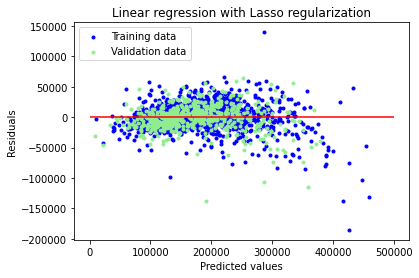

In [176]:
# Plot residuals
plt.scatter(
    y_train_pred, y_train_pred - y_train, c="blue", marker=".", label="Training data"
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="lightgreen",
    marker=".",
    label="Validation data",
)
plt.hlines(y=0, xmin=0, xmax=500000, color="red")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")

plt.savefig("./charts/residuals.png")

plt.show()

Looking at the plot above, the predicted data(green) seems to be generalisation quite well with the actual data(blue), and it is close to the baseline (red line).

In [177]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__alpha,param_classifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.048616,0.006259,0.005182,0.000130,"Lasso(alpha=100, max_iter=10000)",100,10000,"{'classifier': Lasso(alpha=100, max_iter=10000...",-6.045477e+08,-5.183986e+08,-5.581183e+08,-5.603548e+08,3.520578e+07,1
3,0.017190,0.002996,0.004237,0.000170,"Ridge(alpha=1, max_iter=10000)",1,10000,"{'classifier': Ridge(alpha=1, max_iter=10000),...",-6.059767e+08,-5.594321e+08,-5.640789e+08,-5.764959e+08,2.093221e+07,2
10,0.233873,0.113794,0.006889,0.002185,"Lasso(alpha=100, max_iter=10000)",10,10000,"{'classifier': Lasso(alpha=100, max_iter=10000...",-6.204102e+08,-5.936339e+08,-5.512038e+08,-5.884159e+08,2.849328e+07,3
2,0.018765,0.000932,0.004693,0.000213,"Ridge(alpha=1, max_iter=10000)",0.1,10000,"{'classifier': Ridge(alpha=1, max_iter=10000),...",-6.377095e+08,-6.320066e+08,-5.679926e+08,-6.125695e+08,3.160655e+07,4
1,0.017256,0.001038,0.004685,0.000167,"Ridge(alpha=1, max_iter=10000)",0.01,10000,"{'classifier': Ridge(alpha=1, max_iter=10000),...",-6.493620e+08,-6.873530e+08,-5.728325e+08,-6.365158e+08,4.762705e+07,5


### Determining the coefficients via Lasso


In [178]:
ls = Lasso(alpha=100, max_iter=5000)
ls.fit(new_X_train, y_train)


Lasso(alpha=100, max_iter=5000)

In [179]:
coef = pd.Series(ls.coef_, index=new_X_train.columns)

print(
    "Lasso picked "
    + str(sum(coef != 0))
    + " variables and eliminated the other "
    + str(sum(coef == 0))
    + " variables"
)

Lasso picked 85 variables and eliminated the other 135 variables


In [180]:
# check for generalisation
y_train_pred = ls.predict(new_X_train)
y_test_pred = ls.predict(new_X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

perc_diff = (mse_train - mse_test) / mse_train * 100
print(mse_train, mse_test, str(perc_diff) + "%")

print("Root mean squared error:", np.sqrt(mse_test))


468777572.3286788 450172929.61465096 3.9687569995314025%
Root mean squared error: 21217.27903418935


In [181]:
# check for underfit - is your linear regression model better than average of y?
y_train_average=np.repeat(np.mean(y_train),(len(y_train)))
mse_train_avg = mean_squared_error(y_train, y_train_average)
perc_diff = (mse_train -mse_train_avg)/mse_train * 100
print(mse_train_avg, mse_train, str(perc_diff)+"%")

5392059558.332707 468777572.3286788 -1050.2383809761525%


In [182]:
ls.intercept_


-42594.26057539781

In [183]:
imp_coef = pd.concat([coef.sort_values().head(20), coef.sort_values().tail(20)])

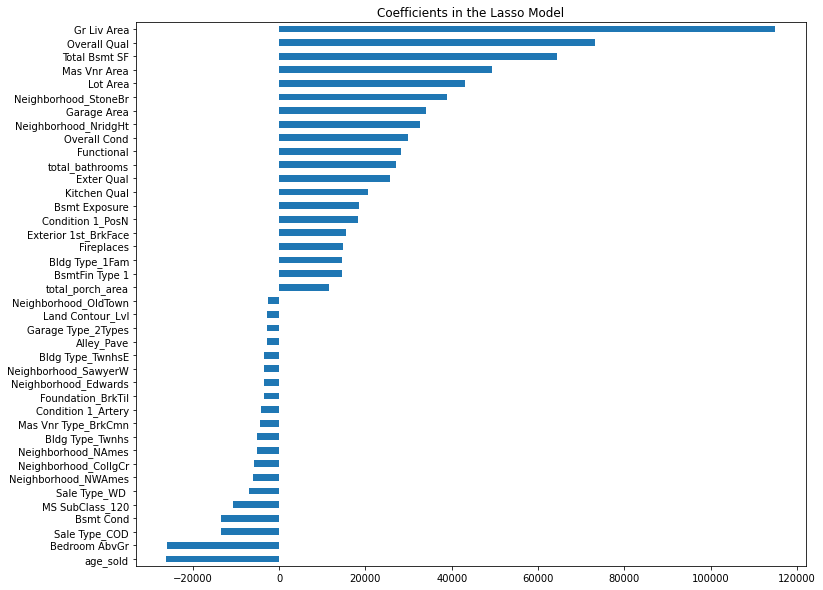

In [184]:
plt.figure(figsize=(12, 10))
imp_coef.plot(kind="barh")
plt.title("Coefficients in the Lasso Model")

plt.savefig('./charts/coefficients in the lasso model.png', bbox_inches='tight')
plt.show()

From the lasso coefficients, Gr Liv Area, Overall Qual and Total Bsmt SF seems to have some of the highest effect on the sale price.

In [185]:
df_corr = pd.DataFrame(imp_coef).reset_index()
df_corr[df_corr[0] > 0].sort_values(by=0, ascending=False).reset_index(drop=True)


,index,0
0,Gr Liv Area,114899.961521
1,Overall Qual,73165.771553
2,Total Bsmt SF,64310.758314
3,Mas Vnr Area,49225.681276
4,Lot Area,43051.589028
5,Neighborhood_StoneBr,38943.053157
6,Garage Area,33999.597536
7,Neighborhood_NridgHt,32738.617938
8,Overall Cond,29958.845706
9,Functional,28192.081680


In [186]:
p_value.head()

,features,p-Value
0,Lot Area,0.0
1,total_bathrooms,0.0
2,Overall Qual,0.0
3,Overall Cond,0.0
4,Mas Vnr Area,0.0


### Combination of p-values with lasso coefficients

In [187]:
df_ls_corr = pd.DataFrame(ls.coef_, index=new_X_train.columns)

df_ls_corr = df_ls_corr.reset_index().rename(columns = {'index':'features'})

In [188]:
df_ls_corr_p = pd.merge(df_ls_corr, p_value, on="features", how="outer")

In [189]:
new_df_ls_corr_p = df_ls_corr_p.loc[
    (df_ls_corr_p['p-Value'] < 0.05) & (abs(df_ls_corr_p[0]) > 0),
    :].sort_values(by=0, ascending=False).reset_index(drop=True)

In [190]:
# Creation a for-loop to loop through the lasso coefficients to reverse min-max scale to determine the unit increase price
d = {}
for col in new_df_ls_corr_p['features'].to_list():
    try:
        r = df_ls_corr_p.loc[df_ls_corr_p['features'] == col, 0].values / (X_train[col].max() - X_train[col].min())
        d[col] = r[0]
        # print(f"{col} : {r}")
    except:
        d[col] = df_ls_corr_p.loc[df_ls_corr_p['features'] == col, 0].values[0]
        continue

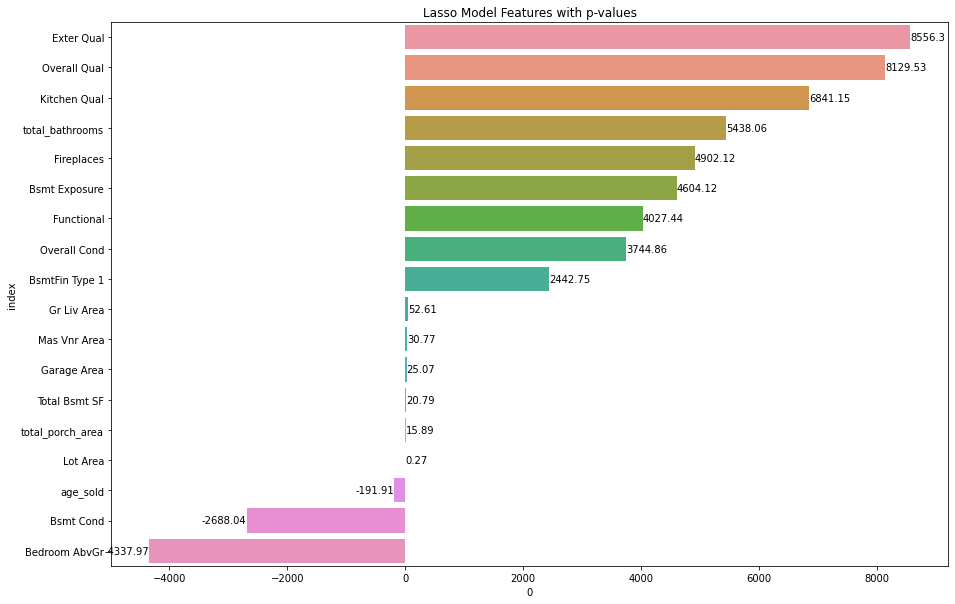

In [191]:
plt.figure(figsize=(15,10))
df_fea = pd.DataFrame(d, index=[0]).T.reset_index()

ax = sns.barplot(
    data=round(df_fea.sort_values(by=0,ascending=False),2),
    y="index",
    x=0,
)
ax.bar_label(ax.containers[0])

plt.title("Lasso Model Features with p-values")
plt.savefig('charts/interpretation of features with low p values and high coeff with actual value.png', bbox_inches='tight')
plt.show()

Looking at the above bar chart, we can see that location is most important, as the different neighbourhood gives a different pricing.

Other important factors include condition 1 - which determines that the house is near to positive off-site features like park, greenbelt.

In [192]:
y_test_pred = ls.predict(new_X_test)


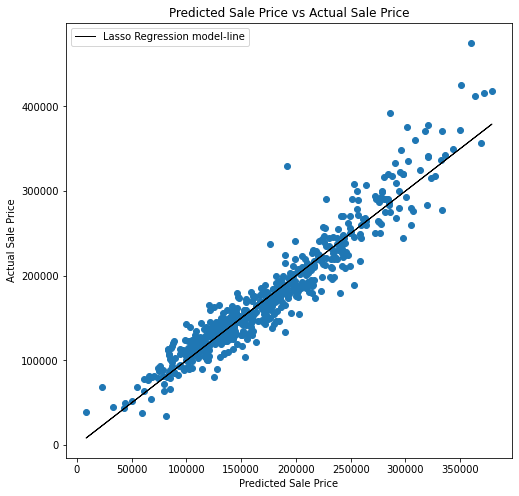

In [193]:
plt.subplots(figsize=(8, 8))
plt.scatter(x=y_test_pred, y=y_test)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Predicted Sale Price vs Actual Sale Price")
plt.plot(
    y_test_pred,
    y_test_pred,
    color="k",
    linewidth=1,
    label="Lasso Regression model-line",
)
plt.legend(loc="upper left")


plt.savefig("./charts/Predicted_vs_Actual_SalePrice.png")
plt.show()

The model seems to best predict the sale prices between 50000 and 250000, any other values outside this range, the model does not predict very well then.

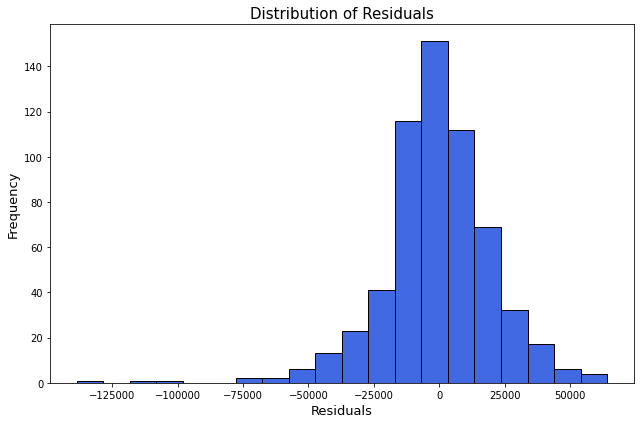

In [194]:
residuals = y_test_pred - y_test

residuals.hist(
    bins=20, figsize=(9, 6), edgecolor="black", grid=False, color="royalblue"
)
plt.title("Distribution of Residuals", fontdict={"fontsize": 15})
plt.xlabel("Residuals", fontdict={"fontsize": 13})
plt.ylabel("Frequency", fontdict={"fontsize": 13})
plt.tight_layout()

plt.savefig("./charts/residuals distribution.png")
plt.show()

# Conclusion

The model was able to predict the Sale Price of the house with a mean squared error of 3.96%, and within the ranges of 50000 and 250000.
In addition, it can only do well if the Gr Liv Area is within the range of 229.75 and 2627.75.

Returning to the problem statement, for investor who want to increase the sale price of the house, the most important thing they can do is to increase some of the following: 
* Increase Gr Liv Area - $52.61
* Increase Overall Qual - $8126.04
* Increase Exter Qual - $8553.64
* Make sure that the house is fully functional - $4027.89
* Increase Over Condition - $3745.21
* Total Bsmt SF - $20.79
* Mas Vnr Area - $30.77
* Lot Area - $0.27

This also ties in with the research found in EDA, that the house size matters in the sale price of the house.
Surprisingly, there are other unexpected features that would increase sale price, like fireplace and total bathrooms, whereas, bedroom abvgrd is at the other end, this may mean that decreasing the number of bedrooms for an increase in the gross living area, increases the sale price.

Furthermore, it is surprising that location does not appear in the p-values list as an important feature in the lass coefficients with p-values taken into consideration.

Another obvious known fact is that as the house age increases, the sale prices decreases by -$191.99



# Recommendations
It is recommended to obtain more year data, especially in 2010, as there seems to be an incomplete data set for that year.
Additionally, other housing data from other surrounding states/city will be also be helpful, as people may not necessary want to stay in the same city.

## To predict the sale price for the test datset to upload into kaggle


In [195]:
kaggle_test_pred = ls.predict(new_df_test)

In [196]:
df_kaggle_pred = pd.DataFrame(kaggle_test_pred)
df_kaggle_pred


,0
0,142279.411200
1,160058.820672
2,224048.408668
3,114816.305968
4,178735.441992
...,...
873,199187.687407
874,216379.814109
875,129780.348116
876,105733.584971


In [197]:
df = pd.DataFrame(
    {"Id": new_df_test.reset_index()["Id"], "SalePrice": df_kaggle_pred[0]}
)

df.to_csv("kaggle_prediction.csv", index=False)

Obtained a Kaggle Score of 

Score: 20492.91670

Public score: 29575.12461